In [2]:
import pandas as pd; from scipy import stats;

In [3]:
from phcalc import calc_pH

In [4]:
data_df=pd.read_csv('071521_WQX_Loss_APR21A.csv')
#data_df['Alk_1000'] = 1000
data_df['Alk_140'] = 140
#data_df['DOC_g/m3'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/0.35
#data_df['DOC_g/m3_run'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/data_df['Runoff_All(mm/day)_Delineated_Average']
#data_df['CO2_2'] = data_df['DOC_g/m3']/4
data_df.head()

Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Year  \
0           0                                0.000173  1998   
1           1                                0.000033  1998   
2           2                                0.000031  1998   
3           3                                0.000030  1998   
4           4                                0.000026  1998   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000036   
1                                0.000008   
2                                0.000008   
3                                0.000009   
4                                0.000008   

   DON_Loss(gN/day/m2)_Delineated_Average  Step  \
0                                0.001555     0   
1                                0.000323     1   
2                                0.000331     2   
3                                0.000343     3   
4                                0.000325     4   

   Runoff_All(mm/day)_Delineated_Average  \
0                              11.570354   
1                               9.667782   
2                               9.306120   
3                               8.755968   
4                               7.950657   

   DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.052350  0.149571            2.6375   
1                                0.010933  0.031238            3.3125   
2                                0.011182  0.031947            0.7625   
3                                0.011572  0.033064            0.0875   
4                                0.010944  0.031268            3.0875   

        CO2  Alk_140  
0  0.037393      140  
1  0.007810      140  
2  0.007987      140  
3  0.008266      140  
4  0.007817      140

In [5]:
data_df.loc[data_df['Runoff_All(mm/day)_Delineated_Average'] ==0]

Empty DataFrame
Columns: [Unnamed: 0, NO3_Loss(gN/day/m2)_Delineated_Average, Year, NH4_Loss(gN/day/m2)_Delineated_Average, DON_Loss(gN/day/m2)_Delineated_Average, Step, Runoff_All(mm/day)_Delineated_Average, DOC_Loss(gC/day/m2)_Delineated_Average, DOC_mg/L, Sfc_Water_Temp_C, CO2, Alk_140]
Index: []

In [6]:
pools_di=pd.read_csv('BCAPR21AWQDI_pHcalc.csv')

In [7]:

pools_di.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Sfcwater_Temp_C', 'CO2',
       'DOC_mg/L', 'CO2_calc', 'pH_calc_200', 'Criteria', 'Condition'})

Step  Runoff_All(mm/day)_Delineated_Average  \
0     1309                               0.033263   
1     1310                               0.049179   
2     1311                               0.059759   
3     1312                               0.043197   
4     1313                               0.033944   
...    ...                                    ...   
1973  3282                               0.088845   
1974  3283                               0.088433   
1975  3284                               0.087845   
1976  3285                               0.089226   
1977  3286                               0.086422   

      DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                               1.723507                           62.777660   
1                               1.723849                           62.833305   
2                               1.724200                           62.889969   
3                               1.724550                           62.946327   
4                               1.724894                           62.999870   
...                                  ...                                 ...   
1973                            2.209917                         1367.609619   
1974                            2.210016                         1367.649902   
1975                            2.210098                         1367.704712   
1976                            2.210190                         1367.847656   
1977                            2.210282                         1367.887939   

      NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  
0                               0.217128                            0.052924  
1                               0.218451                            0.053354  
2                               0.216999                            0.053639  
3                               0.215869                            0.053804  
4                               0.215563                            0.053926  
...                                  ...                                 ...  
1973                            1.636397                            0.966065  
1974                            1.642512                            0.966039  
1975                            1.648304                            0.966004  
1976                            1.654284                            0.965975  
1977                            1.659835                            0.965934  

[1978 rows x 6 columns]

In [8]:
perc = [0.1, 0.25, 0.5, .75, .9]

In [9]:
pools_di.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Sfcwater_Temp_C', 'CO2',
       'DOC_mg/L', 'CO2_calc', 'pH_calc_200', 'Criteria', 'Condition'}).describe(percentiles =perc)

Step  Runoff_All(mm/day)_Delineated_Average  \
count  1978.000000                            1978.000000   
mean   2297.500000                               0.205125   
std     571.143736                               0.697596   
min    1309.000000                               0.002260   
10%    1506.700000                               0.005910   
25%    1803.250000                               0.051539   
50%    2297.500000                               0.115309   
75%    2791.750000                               0.229124   
90%    3088.300000                               0.496839   
max    3286.000000                              29.388712   

       DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             1.940098                          646.775646   
std                              0.141099                          415.764355   
min                              1.723507                           62.777660   
10%                              1.754766                           66.882041   
25%                              1.819078                          282.454948   
50%                              1.919882                          610.156433   
75%                              2.062290                         1028.522614   
90%                              2.132666                         1194.912964   
max                              2.210282                         1367.887939   

       NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  
count                         1978.000000                         1978.000000  
mean                             1.287228                            0.390621  
std                              0.607010                            0.283830  
min                              0.208370                            0.052924  
10%                              0.357675                            0.064745  
25%                              0.884668                            0.209112  
50%                              1.293127                            0.276556  
75%                              1.717844                            0.645231  
90%                              2.098197                            0.933609  
max                              2.570091                            1.194570

In [10]:
data_df.describe(percentiles=perc)

Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average         Year  \
count  3287.000000                            3.287000e+03  3287.000000   
mean   1643.000000                            4.429088e-06  2002.000000   
std     949.019494                            9.098820e-06     2.582067   
min       0.000000                            6.078645e-10  1998.000000   
10%     328.600000                            2.022193e-08  1998.000000   
25%     821.500000                            5.444414e-08  2000.000000   
50%    1643.000000                            1.405365e-06  2002.000000   
75%    2464.500000                            5.927934e-06  2004.000000   
90%    2957.400000                            1.304791e-05  2006.000000   
max    3286.000000                            2.999136e-04  2006.000000   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             6.601599e-06   
std                              1.325734e-05   
min                              6.251203e-08   
10%                              9.847706e-08   
25%                              1.837206e-07   
50%                              2.510358e-06   
75%                              7.793907e-06   
90%                              1.576521e-05   
max                              3.049862e-04   

       DON_Loss(gN/day/m2)_Delineated_Average         Step  \
count                            3.287000e+03  3287.000000   
mean                             2.197756e-05  1643.000000   
std                              4.630453e-05   949.019494   
min                              4.437417e-07     0.000000   
10%                              1.254997e-06   328.600000   
25%                              2.938069e-06   821.500000   
50%                              1.042756e-05  1643.000000   
75%                              2.403923e-05  2464.500000   
90%                              5.031524e-05  2957.400000   
max                              1.554523e-03  3286.000000   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.192166   
std                                 0.731214   
min                                 0.002260   
10%                                 0.003516   
25%                                 0.009843   
50%                                 0.066563   
75%                                 0.182819   
90%                                 0.469919   
max                                29.388712   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.015237     0.043535         11.248536   
std                                  0.042300     0.120858          6.931090   
min                                  0.000029     0.000084        -10.562500   
10%                                  0.000075     0.000214          2.262500   
25%                                  0.000193     0.000551          5.787500   
50%                                  0.003675     0.010501         11.112499   
75%                                  0.019601     0.056002         17.712502   
90%                                  0.038432     0.109807         20.412498   
max                                  1.820812     5.202320         24.087502   

               CO2  Alk_140  
count  3287.000000   3287.0  
mean      0.010884    140.0  
std       0.030214      0.0  
min       0.000021    140.0  
10%       0.000054    140.0  
25%       0.000138    140.0  
50%       0.002625    140.0  
75%       0.014000    140.0  
90%       0.027452    140.0  
max       1.300580    140.0

In [11]:
stats.describe(data_df['DOC_Loss(gC/day/m2)_Delineated_Average'])

DescribeResult(nobs=3287, minmax=(2.9451126465573907e-05, 1.820811867713928), mean=0.015237260912951838, variance=0.001789308927443058, skewness=25.120781755619152, kurtosis=1015.3157456718683)

In [12]:
stats.describe(data_df['DOC_mg/L'])

DescribeResult(nobs=3287, minmax=(8.414607561592546e-05, 5.202319622039795), mean=0.04353503117986245, variance=0.014606603489331092, skewness=25.120781755619152, kurtosis=1015.3157456718689)

In [13]:
"""these are corrected columns...."""
row=data_df.iloc[0,:]
[row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']]

[0.0373928514974457, 2.6374998, 0.1495714059897831, 140.0]

In [14]:
215/(12*0.35)

51.1904761904762

In [15]:
"""This works, but the next is better if you need the calculation back in the dataframe"""
id_list =[]; row_list =[];
for row_id,row in data_df.iterrows():
    row_list.append(calc_pH(row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']))
    id_list.append(row_id)

CO2 Estimate 0.8498375340328569
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 8.180891339256767e-07
SQRT of Alpha= 0.0009044827991320104
A value 3.0435996878567746
B value 0.43429448190325176
C value 0.0018089655982640208

CO2 Estimate 0.17748870463533636
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 1.735880656036776e-07
SQRT of Alpha= 0.0004166390111399527
A value 3.380240068210621
B value 0.43429448190325176
C value 0.0008332780222799054

CO2 Estimate 0.18151812618235455
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 1.6700656262476976e-07
SQRT of Alpha= 0.00040866436427069313
A value 3.3886332313252345
B value 0.43429448190325176
C value 0.0008173287285413863

CO2 Estimate 0.1878648929830091
Exponent value 6.043450946767136
H2CO3 value 9.047926276090163e-07
pkw= 1e-14
Alpha value= 1.6997878015758345e-07
SQRT of Alpha= 0.0004122848289199876
A value 3.

C value 0.00029143882404633186

CO2 Estimate 0.016842741978824998
Exponent value 5.9903277072500005
H2CO3 value 1.0225211334185413e-06
pkw= 1e-14
Alpha value= 1.722206961806418e-08
SQRT of Alpha= 0.00013123288314315199
A value 3.8819573297601173
B value 0.43429448190325176
C value 0.00026246576628630397

CO2 Estimate 0.015525702937420454
Exponent value 6.008892159271609
H2CO3 value 9.797332351699863e-07
pkw= 1e-14
Alpha value= 1.5211057167167102e-08
SQRT of Alpha= 0.00012333311464147453
A value 3.908920300734438
B value 0.43429448190325176
C value 0.00024666622928294906

CO2 Estimate 0.015147801038095455
Exponent value 5.976035047250001
H2CO3 value 1.0567322282475348e-06
pkw= 1e-14
Alpha value= 1.600717954403693e-08
SQRT of Alpha= 0.00012651948286345835
A value 3.897842591890723
B value 0.43429448190325176
C value 0.0002530389657269167

CO2 Estimate 0.016404572472145454
Exponent value 5.949593281250001
H2CO3 value 1.1230697218496224e-06
pkw= 1e-14
Alpha value= 1.8423488643354368e-08
SQ

Exponent value 5.8590765972500005
H2CO3 value 1.3833223785548223e-06
pkw= 1e-14
Alpha value= 8.98262588869147e-09
SQRT of Alpha= 9.477671596279051e-05
A value 4.023298343789687
B value 0.43429448190325176
C value 0.00018955343192558101

CO2 Estimate 0.0057578881160795445
Exponent value 5.8528971067886415
H2CO3 value 1.4031460990843617e-06
pkw= 1e-14
Alpha value= 8.079168249041217e-09
SQRT of Alpha= 8.988419354392193e-05
A value 4.046316673786293
B value 0.43429448190325176
C value 0.00017976838708784387

CO2 Estimate 0.005175535587513637
Exponent value 5.857731913347041
H2CO3 value 1.3876121268755564e-06
pkw= 1e-14
Alpha value= 7.1816459443099295e-09
SQRT of Alpha= 8.474459241928023e-05
A value 4.071888004716551
B value 0.43429448190325176
C value 0.00016948918483856046

CO2 Estimate 0.00486262452595
Exponent value 5.85420078125
H2CO3 value 1.3989404206295284e-06
pkw= 1e-14
Alpha value= 6.8025319996959535e-09
SQRT of Alpha= 8.247746358670321e-05
A value 4.08366470329239
B value 0.43429

Alpha value= 1.1105605324853541e-09
SQRT of Alpha= 3.332507363060664e-05
A value 4.477228882354288
B value 0.43429448190325176
C value 6.665014726121328e-05

CO2 Estimate 0.0009010973490030784
Exponent value 5.93426038556956
H2CO3 value 1.1634282752823488e-06
pkw= 1e-14
Alpha value= 1.0483721346121483e-09
SQRT of Alpha= 3.237857524061472e-05
A value 4.489742265488533
B value 0.43429448190325176
C value 6.475715048122944e-05

CO2 Estimate 0.0008737618361022204
Exponent value 5.935510795250001
H2CO3 value 1.1600833796182916e-06
pkw= 1e-14
Alpha value= 1.0136465838069476e-09
SQRT of Alpha= 3.1837816881924354e-05
A value 4.497056719472025
B value 0.43429448190325176
C value 6.367563376384871e-05

CO2 Estimate 0.0008518258278831152
Exponent value 5.966325781250001
H2CO3 value 1.080623029651281e-06
pkw= 1e-14
Alpha value= 9.205126068622625e-10
SQRT of Alpha= 3.0339950673365678e-05
A value 4.51798512962386
B value 0.43429448190325176
C value 6.0679901346731356e-05

CO2 Estimate 0.001044539309


CO2 Estimate 0.000631440024654375
Exponent value 6.025086181250001
H2CO3 value 9.438735557516796e-07
pkw= 1e-14
Alpha value= 5.960095413144532e-10
SQRT of Alpha= 2.4413306644419416e-05
A value 4.612373393865578
B value 0.43429448190325176
C value 4.882661328883883e-05

CO2 Estimate 0.0006261686169861382
Exponent value 6.025870986202764
H2CO3 value 9.421694407517647e-07
pkw= 1e-14
Alpha value= 5.899669356821357e-10
SQRT of Alpha= 2.4289234975234105e-05
A value 4.6145861637155186
B value 0.43429448190325176
C value 4.857846995046821e-05

CO2 Estimate 0.0006218182203486901
Exponent value 5.99471238125
H2CO3 value 1.012249611479344e-06
pkw= 1e-14
Alpha value= 6.294452519587387e-10
SQRT of Alpha= 2.5088747516740223e-05
A value 4.600521019041932
B value 0.43429448190325176
C value 5.0177495033480446e-05

CO2 Estimate 0.0005976066445741293
Exponent value 5.96976543125
H2CO3 value 1.0720982046808511e-06
pkw= 1e-14
Alpha value= 6.407030107532715e-10
SQRT of Alpha= 2.5312111937830703e-05
A valu


CO2 Estimate 0.0022581300615822876
Exponent value 5.98815213725
H2CO3 value 1.0276562378720133e-06
pkw= 1e-14
Alpha value= 2.3205914437113513e-09
SQRT of Alpha= 4.817251751477549e-05
A value 4.317200656691475
B value 0.43429448190325176
C value 9.634503502955098e-05

CO2 Estimate 0.0021839367910651128
Exponent value 5.95221831725
H2CO3 value 1.1163019483691394e-06
pkw= 1e-14
Alpha value= 2.4379428949810312e-09
SQRT of Alpha= 4.937552931342642e-05
A value 4.306488235635496
B value 0.43429448190325176
C value 9.875105862685283e-05

CO2 Estimate 0.0020048029508363072
Exponent value 5.938658575250001
H2CO3 value 1.1517054573659988e-06
pkw= 1e-14
Alpha value= 2.308952499421633e-09
SQRT of Alpha= 4.8051560842720116e-05
A value 4.318292500724449
B value 0.43429448190325176
C value 9.610312168544023e-05

CO2 Estimate 0.001804054319380795
Exponent value 5.9411991552500005
H2CO3 value 1.1449877618137441e-06
pkw= 1e-14
Alpha value= 2.065630117338234e-09
SQRT of Alpha= 4.5449203704116026e-05
A va

B value 0.43429448190325176
C value 0.00029376780564111123

CO2 Estimate 0.013483109182447729
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 1.829830749388836e-08
SQRT of Alpha= 0.0001352712367574436
A value 3.868794539289374
B value 0.43429448190325176
C value 0.0002705424735148872

CO2 Estimate 0.011442253152936364
Exponent value 5.87023638125
H2CO3 value 1.3482288581382126e-06
pkw= 1e-14
Alpha value= 1.5426785902911758e-08
SQRT of Alpha= 0.0001242046130500464
A value 3.9058622738456283
B value 0.43429448190325176
C value 0.0002484092261000928

CO2 Estimate 0.010069107973959091
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 1.3665072762040067e-08
SQRT of Alpha= 0.00011689770212472128
A value 3.9321940257445926
B value 0.43429448190325176
C value 0.00023379540424944256

CO2 Estimate 0.009374571518136364
Exponent value 5.865499531250001
H2CO3 value 1.3630144773586628e-06
pkw= 1e-14
Alpha value= 1.27776866

C value 0.00013571225616749592

CO2 Estimate 0.003768559567956818
Exponent value 5.949593281250001
H2CO3 value 1.1230697218496224e-06
pkw= 1e-14
Alpha value= 4.232365145758997e-09
SQRT of Alpha= 6.505663029821786e-05
A value 4.186708435379242
B value 0.43429448190325176
C value 0.0001301132605964357

CO2 Estimate 0.0034279006498545454
Exponent value 5.970457087250001
H2CO3 value 1.0703921434105187e-06
pkw= 1e-14
Alpha value= 3.669207923996117e-09
SQRT of Alpha= 6.057398718918969e-05
A value 4.21771383863203
B value 0.43429448190325176
C value 0.00012114797437837938

CO2 Estimate 0.0031957427960477274
Exponent value 6.0235202962922685
H2CO3 value 9.472829132069233e-07
pkw= 1e-14
Alpha value= 3.0272825457001298e-09
SQRT of Alpha= 5.502074650257055e-05
A value 4.2594735215481565
B value 0.43429448190325176
C value 0.0001100414930051411

CO2 Estimate 0.003031321509072727
Exponent value 5.982405265250001
H2CO3 value 1.0413452365090698e-06
pkw= 1e-14
Alpha value= 3.1566622138003695e-09
SQRT 

H2CO3 value 9.660581634181786e-07
pkw= 1e-14
Alpha value= 2.6848552375781492e-09
SQRT of Alpha= 5.181558875066604e-05
A value 4.285539562843641
B value 0.43429448190325176
C value 0.00010363117750133208

CO2 Estimate 0.0026585373482454545
Exponent value 6.026657034201109
H2CO3 value 9.404657106215986e-07
pkw= 1e-14
Alpha value= 2.5002732164317215e-09
SQRT of Alpha= 5.000273208967407e-05
A value 4.30100626568291
B value 0.43429448190325176
C value 0.00010000546417934815

CO2 Estimate 0.0025539371894068184
Exponent value 6.024302618293925
H2CO3 value 9.455780488372846e-07
pkw= 1e-14
Alpha value= 2.414956944412278e-09
SQRT of Alpha= 4.9142211431846225e-05
A value 4.308545303878771
B value 0.43429448190325176
C value 9.828442286369245e-05

CO2 Estimate 0.0024549936151500003
Exponent value 6.025086181250001
H2CO3 value 9.438735557516796e-07
pkw= 1e-14
Alpha value= 2.317213552879301e-09
SQRT of Alpha= 4.813744439497491e-05
A value 4.317516970035679
B value 0.43429448190325176
C value 9.62748

CO2 Estimate 0.0032902194520409087
Exponent value 5.8831334472500005
H2CO3 value 1.3087797076915556e-06
pkw= 1e-14
Alpha value= 4.3061824526831705e-09
SQRT of Alpha= 6.562150907045014e-05
A value 4.182953786546229
B value 0.43429448190325176
C value 0.00013124301814090028

CO2 Estimate 0.0026946650763545453
Exponent value 5.92262918525
H2CO3 value 1.1950080056815688e-06
pkw= 1e-14
Alpha value= 3.220156338874217e-09
SQRT of Alpha= 5.674642137504547e-05
A value 4.246061521378459
B value 0.43429448190325176
C value 0.00011349284275009093

CO2 Estimate 0.002410969346936364
Exponent value 5.9232301752500005
H2CO3 value 1.1933554607029728e-06
pkw= 1e-14
Alpha value= 2.8771534357539903e-09
SQRT of Alpha= 5.363910360692086e-05
A value 4.270518488497932
B value 0.43429448190325176
C value 0.00010727820721384172

CO2 Estimate 0.0022646937785404074
Exponent value 5.902376995250001
H2CO3 value 1.2520538406541363e-06
pkw= 1e-14
Alpha value= 2.835528543327045e-09
SQRT of Alpha= 5.324968115704586e-05

C value 9.146247692437282e-05

CO2 Estimate 0.0014377074911827586
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 1.955400756474273e-09
SQRT of Alpha= 4.421991357379923e-05
A value 4.3543821105691265
B value 0.43429448190325176
C value 8.843982714759846e-05

CO2 Estimate 0.0013693201041163566
Exponent value 5.86880229794784
H2CO3 value 1.3526882016226398e-06
pkw= 1e-14
Alpha value= 1.8522731490828805e-09
SQRT of Alpha= 4.303804304429838e-05
A value 4.366147484423097
B value 0.43429448190325176
C value 8.607608608859676e-05

CO2 Estimate 0.0012950629327376677
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 1.73636887799108e-09
SQRT of Alpha= 4.166975975441999e-05
A value 4.380179003445541
B value 0.43429448190325176
C value 8.333951950883998e-05

CO2 Estimate 0.0012323941412539063
Exponent value 5.87957856725
H2CO3 value 1.319536575682413e-06
pkw= 1e-14
Alpha value= 1.6261991450412476e-09
SQRT of Alp

SQRT of Alpha= 2.446958064294534e-05
A value 4.611373473476792
B value 0.43429448190325176
C value 4.893916128589068e-05

CO2 Estimate 0.0005877047867700155
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 6.150290197524271e-10
SQRT of Alpha= 2.479977862305281e-05
A value 4.605552195916352
B value 0.43429448190325176
C value 4.959955724610562e-05

CO2 Estimate 0.0006145349395304145
Exponent value 5.983119277250001
H2CO3 value 1.0396345951139242e-06
pkw= 1e-14
Alpha value= 6.389017830420624e-10
SQRT of Alpha= 2.5276506543469618e-05
A value 4.597282949920275
B value 0.43429448190325176
C value 5.0553013086939236e-05

CO2 Estimate 0.0006362142812577077
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 6.363937308019655e-10
SQRT of Alpha= 2.522684543897563e-05
A value 4.5981370536481165
B value 0.43429448190325176
C value 5.045369087795126e-05

CO2 Estimate 0.0006312658623247951
Exponent value 6.02744432630054

C value 0.00012528233783463925

CO2 Estimate 0.0035733168048159092
Exponent value 5.988876085250001
H2CO3 value 1.0259446113774308e-06
pkw= 1e-14
Alpha value= 3.6660351206453006e-09
SQRT of Alpha= 6.054779203773909e-05
A value 4.217901689404659
B value 0.43429448190325176
C value 0.00012109558407547817

CO2 Estimate 0.0032829271943909093
Exponent value 5.971149985250001
H2CO3 value 1.0686857408021785e-06
pkw= 1e-14
Alpha value= 3.5084274807372665e-09
SQRT of Alpha= 5.923198021961841e-05
A value 4.2274437479587945
B value 0.43429448190325176
C value 0.00011846396043923682

CO2 Estimate 0.0029952464607840915
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 3.2265321317747365e-09
SQRT of Alpha= 5.680257152431337e-05
A value 4.245632002783003
B value 0.43429448190325176
C value 0.00011360514304862674

CO2 Estimate 0.003007996631572727
Exponent value 5.9969214852500015
H2CO3 value 1.0071137253558245e-06
pkw= 1e-14
Alpha value= 3.0294046934809807e-

CO2 Estimate 0.0012120340983670617
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 1.60303671275131e-09
SQRT of Alpha= 4.0037940915478035e-05
A value 4.397528265659256
B value 0.43429448190325176
C value 8.007588183095607e-05

CO2 Estimate 0.0013208681322156466
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 1.7590231861902604e-09
SQRT of Alpha= 4.194071036821218e-05
A value 4.377364217972201
B value 0.43429448190325176
C value 8.388142073642436e-05

CO2 Estimate 0.0012642963806034197
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 1.6989077935263849e-09
SQRT of Alpha= 4.121780917912043e-05
A value 4.384915095688891
B value 0.43429448190325176
C value 8.243561835824087e-05

CO2 Estimate 0.0012111712595623278
Exponent value 5.86134255725
H2CO3 value 1.3761235995188426e-06
pkw= 1e-14
Alpha value= 1.666731353342681e-09
SQRT of Alpha= 4.0825621285446236e-05
A value

SQRT of Alpha= 0.00011888735629369664
A value 3.92486433027498
B value 0.43429448190325176
C value 0.00023777471258739328

CO2 Estimate 0.009490090101811365
Exponent value 5.903493269791561
H2CO3 value 1.248839797557956e-06
pkw= 1e-14
Alpha value= 1.1851612201552866e-08
SQRT of Alpha= 0.00010886511012051963
A value 3.9631112837884106
B value 0.43429448190325176
C value 0.00021773022024103926

CO2 Estimate 0.008186443547063637
Exponent value 5.911446355250001
H2CO3 value 1.226178352838118e-06
pkw= 1e-14
Alpha value= 1.003804986414073e-08
SQRT of Alpha= 0.00010019006869016875
A value 3.999175325642612
B value 0.43429448190325176
C value 0.0002003801373803375

CO2 Estimate 0.008068847063286365
Exponent value 5.968385845250001
H2CO3 value 1.0755092619547499e-06
pkw= 1e-14
Alpha value= 8.678129749860869e-09
SQRT of Alpha= 9.315647991342775e-05
A value 4.030786930432088
B value 0.43429448190325176
C value 0.0001863129598268555

CO2 Estimate 0.008968661906643182
Exponent value 5.96976543125
H

Alpha value= 1.396668382328623e-09
SQRT of Alpha= 3.737202673562972e-05
A value 4.427453349133701
B value 0.43429448190325176
C value 7.474405347125944e-05

CO2 Estimate 0.001521514238813868
Exponent value 6.106995110425152
H2CO3 value 7.816366047212519e-07
pkw= 1e-14
Alpha value= 1.189281223661512e-09
SQRT of Alpha= 3.4485956905115915e-05
A value 4.462357718845814
B value 0.43429448190325176
C value 6.897191381023183e-05

CO2 Estimate 0.0015080539534600187
Exponent value 6.061632031250001
H2CO3 value 8.676967459363006e-07
pkw= 1e-14
Alpha value= 1.3085435081136316e-09
SQRT of Alpha= 3.617379587648539e-05
A value 4.4416059164052335
B value 0.43429448190325176
C value 7.234759175297078e-05

CO2 Estimate 0.0014910471112340353
Exponent value 5.993978497250001
H2CO3 value 1.013961587670372e-06
pkw= 1e-14
Alpha value= 1.5118744961981843e-09
SQRT of Alpha= 3.888283035220281e-05
A value 4.410242129506968
B value 0.43429448190325176
C value 7.776566070440563e-05

CO2 Estimate 0.001487810255025

A value 4.165635850950432
B value 0.43429448190325176
C value 0.0001365822128531109

CO2 Estimate 0.005390872750218182
Exponent value 5.961562435250001
H2CO3 value 1.0925405495637868e-06
pkw= 1e-14
Alpha value= 5.889757077151815e-09
SQRT of Alpha= 7.674475276624334e-05
A value 4.11495130865298
B value 0.43429448190325176
C value 0.00015348950553248667

CO2 Estimate 0.0052163622140954545
Exponent value 5.95552755725
H2CO3 value 1.1078282682132512e-06
pkw= 1e-14
Alpha value= 5.778843518014408e-09
SQRT of Alpha= 7.601870505352224e-05
A value 4.119079532692657
B value 0.43429448190325176
C value 0.00015203741010704448

CO2 Estimate 0.005386220861993182
Exponent value 5.91434573525
H2CO3 value 1.2180195659593493e-06
pkw= 1e-14
Alpha value= 6.5605323964861275e-09
SQRT of Alpha= 8.099711350712522e-05
A value 4.09153045779128
B value 0.43429448190325176
C value 0.00016199422701425044

CO2 Estimate 0.00550519788785909
Exponent value 5.92383239921196
H2CO3 value 1.1917018149950869e-06
pkw= 1e-14

Alpha value= 8.058352471025264e-07
SQRT of Alpha= 0.0008976832665826663
A value 3.046876870281124
B value 0.43429448190325176
C value 0.0017953665331653327

CO2 Estimate 0.9381720892988227
Exponent value 5.909721631250001
H2CO3 value 1.2310575861743383e-06
pkw= 1e-14
Alpha value= 1.1549438776683443e-06
SQRT of Alpha= 0.001074683152221316
A value 2.9687195594924702
B value 0.43429448190325176
C value 0.002149366304442632

CO2 Estimate 0.9084432446337364
Exponent value 5.902934515250001
H2CO3 value 1.250447563750427e-06
pkw= 1e-14
Alpha value= 1.1359606520577888e-06
SQRT of Alpha= 0.0010658145486236285
A value 2.9723183558310446
B value 0.43429448190325176
C value 0.002131629097247257

CO2 Estimate 0.49315024070538405
Exponent value 5.90071187987436
H2CO3 value 1.2568635169507612e-06
pkw= 1e-14
Alpha value= 6.198225559180835e-07
SQRT of Alpha= 0.0007872881022332825
A value 3.103866311714942
B value 0.43429448190325176
C value 0.001574576204466565

CO2 Estimate 0.33712697928989094
Exponen

B value 0.43429448190325176
C value 0.0006451868123214738

CO2 Estimate 0.08691239848055454
Exponent value 5.92023764525
H2CO3 value 1.2016067373921536e-06
pkw= 1e-14
Alpha value= 1.0443453357714592e-07
SQRT of Alpha= 0.0003231633233786686
A value 3.4905779342777272
B value 0.43429448190325176
C value 0.0006463266467573372

CO2 Estimate 0.08420009534902727
Exponent value 5.93177444525
H2CO3 value 1.1701069388139957e-06
pkw= 1e-14
Alpha value= 9.852312581669685e-08
SQRT of Alpha= 0.00031388393685675736
A value 3.503230908935104
B value 0.43429448190325176
C value 0.0006277678737135147

CO2 Estimate 0.08309029447906591
Exponent value 5.9725395072500005
H2CO3 value 1.0652719527432427e-06
pkw= 1e-14
Alpha value= 8.851377025372562e-08
SQRT of Alpha= 0.00029751263881342186
A value 3.526494580018338
B value 0.43429448190325176
C value 0.0005950252776268437

CO2 Estimate 0.08054040584035682
Exponent value 5.97533345525
H2CO3 value 1.058440732692228e-06
pkw= 1e-14
Alpha value= 8.524725616899666

Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 1.3110948123469053e-07
SQRT of Alpha= 0.00036209043239871793
A value 3.44118295049737
B value 0.43429448190325176
C value 0.0007241808647974359

CO2 Estimate 0.23429412031908864
Exponent value 5.96564157725
H2CO3 value 1.0823268259215043e-06
pkw= 1e-14
Alpha value= 2.535828215770302e-07
SQRT of Alpha= 0.0005035700761334318
A value 3.2979400850698277
B value 0.43429448190325176
C value 0.0010071401522668635

CO2 Estimate 0.21064794598171363
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value= 2.3264691614821233e-07
SQRT of Alpha= 0.0004823348589395259
A value 3.316651349942083
B value 0.43429448190325176
C value 0.0009646697178790518

CO2 Estimate 0.19106539208200002
Exponent value 5.945047285249999
H2CO3 value 1.1348872443381085e-06
pkw= 1e-14
Alpha value= 2.1683768630832126e-07
SQRT of Alpha= 0.00046565833645315666
A value 3.3319326176780346
B value 0.43429448

pkw= 1e-14
Alpha value= 5.759494758261505e-07
SQRT of Alpha= 0.0007589133519883218
A value 3.1198078063199093
B value 0.43429448190325176
C value 0.0015178267039766436

CO2 Estimate 0.5747877400029773
Exponent value 5.92564655525
H2CO3 value 1.1867341629801074e-06
pkw= 1e-14
Alpha value= 6.821202575236609e-07
SQRT of Alpha= 0.0008259057195126214
A value 3.083069526326564
B value 0.43429448190325176
C value 0.0016518114390252428

CO2 Estimate 0.9098874598548
Exponent value 5.935510795250001
H2CO3 value 1.1600833796182916e-06
pkw= 1e-14
Alpha value= 1.055545329500659e-06
SQRT of Alpha= 0.001027397357160636
A value 2.9882615557734766
B value 0.43429448190325176
C value 0.002054794714321272

CO2 Estimate 1.0016361590136182
Exponent value 5.92262918525
H2CO3 value 1.1950080056815688e-06
pkw= 1e-14
Alpha value= 1.1969632388014107e-06
SQRT of Alpha= 0.00109405815147158
A value 2.960959593731989
B value 0.43429448190325176
C value 0.00218811630294316

CO2 Estimate 0.7379454161439615
Exponent v

Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 4.4447756022702633e-07
SQRT of Alpha= 0.000666691503040969
A value 3.1760750799065876
B value 0.43429448190325176
C value 0.001333383006081938

CO2 Estimate 0.3114652324032454
Exponent value 5.87707662725
H2CO3 value 1.3271602718986335e-06
pkw= 1e-14
Alpha value= 4.133642925232623e-07
SQRT of Alpha= 0.0006429341276703721
A value 3.1918335207845563
B value 0.43429448190325176
C value 0.0012858682553407441

CO2 Estimate 0.2899726659253045
Exponent value 5.881602461691041
H2CO3 value 1.3134015918189974e-06
pkw= 1e-14
Alpha value= 3.808505710102933e-07
SQRT of Alpha= 0.0006171309188578168
A value 3.2096226944656068
B value 0.43429448190325176
C value 0.0012342618377156336

CO2 Estimate 0.2740463544312227
Exponent value 5.881602461691041
H2CO3 value 1.3134015918189974e-06
pkw= 1e-14
Alpha value= 3.5993292814216103e-07
SQRT of Alpha= 0.0005999441041815155
A value 3.2218892102435843
B value 0.434294481

CO2 Estimate 0.5088351037982205
Exponent value 5.95287768125
H2CO3 value 1.1146084181015268e-06
pkw= 1e-14
Alpha value= 5.671519001190608e-07
SQRT of Alpha= 0.0007530948812195319
A value 3.1231503042850806
B value 0.43429448190325176
C value 0.0015061897624390637

CO2 Estimate 0.4498709851948455
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 4.853742869906299e-07
SQRT of Alpha= 0.0006966880844327896
A value 3.156961617209569
B value 0.43429448190325176
C value 0.0013933761688655793

CO2 Estimate 0.40541675135299543
Exponent value 6.008892159271609
H2CO3 value 9.797332351699863e-07
pkw= 1e-14
Alpha value= 3.972002753951761e-07
SQRT of Alpha= 0.0006302382687485552
A value 3.2004952295312235
B value 0.43429448190325176
C value 0.0012604765374971104

CO2 Estimate 0.37100030012525453
Exponent value 6.011934505250001
H2CO3 value 9.72893932158218e-07
pkw= 1e-14
Alpha value= 3.6094395082073785e-07
SQRT of Alpha= 0.0006007861107089093
A value 3.2212

Alpha value= 2.3149438493736238e-07
SQRT of Alpha= 0.0004811386338025272
A value 3.317729769321488
B value 0.43429448190325176
C value 0.0009622772676050544

CO2 Estimate 0.28111131305431364
Exponent value 5.9969214852500015
H2CO3 value 1.0071137253558245e-06
pkw= 1e-14
Alpha value= 2.831110717297972e-07
SQRT of Alpha= 0.0005320818280394447
A value 3.2740215730936173
B value 0.43429448190325176
C value 0.0010641636560788895

CO2 Estimate 0.39625296054722275
Exponent value 6.032990131250001
H2CO3 value 9.2685088456277e-07
pkw= 1e-14
Alpha value= 3.6726741699380976e-07
SQRT of Alpha= 0.0006060259210576803
A value 3.2175087997090257
B value 0.43429448190325176
C value 0.0012120518421153605

CO2 Estimate 0.3624910355678614
Exponent value 6.01962731525
H2CO3 value 9.558124535127698e-07
pkw= 1e-14
Alpha value= 3.464734560825023e-07
SQRT of Alpha= 0.0005886199589569676
A value 3.2301650159062762
B value 0.43429448190325176
C value 0.0011772399179139352

CO2 Estimate 0.334023044432525
Exponent

CO2 Estimate 0.6886050346996864
Exponent value 5.8952422572500005
H2CO3 value 1.2727928962562626e-06
pkw= 1e-14
Alpha value= 8.764516064920581e-07
SQRT of Alpha= 0.0009361899414606301
A value 3.0286360292966044
B value 0.43429448190325176
C value 0.0018723798829212602

CO2 Estimate 0.5923055547785431
Exponent value 5.89796154725
H2CO3 value 1.264848333106837e-06
pkw= 1e-14
Alpha value= 7.491767036515606e-07
SQRT of Alpha= 0.0008655499428984792
A value 3.0627078679394306
B value 0.43429448190325176
C value 0.0017310998857969584

CO2 Estimate 0.5221281611880682
Exponent value 5.88989682725
H2CO3 value 1.288555629811343e-06
pkw= 1e-14
Alpha value= 6.727911915819296e-07
SQRT of Alpha= 0.0008202384967690371
A value 3.0860598515542423
B value 0.43429448190325176
C value 0.0016404769935380742

CO2 Estimate 0.5244937810030842
Exponent value 5.886228939107041
H2CO3 value 1.2994843719519987e-06
pkw= 1e-14
Alpha value= 6.81571481599522e-07
SQRT of Alpha= 0.000825573425928622
A value 3.08324429483


CO2 Estimate 0.39083242126099316
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 5.127185547517033e-07
SQRT of Alpha= 0.0007160436821533329
A value 3.1450604828046034
B value 0.43429448190325176
C value 0.0014320873643066659

CO2 Estimate 0.36416272935155
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 4.777315759829828e-07
SQRT of Alpha= 0.0006911812902437266
A value 3.160408026394155
B value 0.43429448190325176
C value 0.0013823625804874533

CO2 Estimate 0.3413865705589182
Exponent value 5.899608025250001
H2CO3 value 1.2600621744097073e-06
pkw= 1e-14
Alpha value= 4.301683144127434e-07
SQRT of Alpha= 0.0006558721784103541
A value 3.183180791142679
B value 0.43429448190325176
C value 0.0013117443568207083

CO2 Estimate 0.3223126004268591
Exponent value 5.905740745250001
H2CO3 value 1.242393740819147e-06
pkw= 1e-14
Alpha value= 4.0043916735747247e-07
SQRT of Alpha= 0.000632802629069659
A value 3.19873

B value 0.43429448190325176
C value 0.0006226808806339773

CO2 Estimate 0.09661858641336818
Exponent value 6.005117167250001
H2CO3 value 9.882864312992452e-07
pkw= 1e-14
Alpha value= 9.548684796364538e-08
SQRT of Alpha= 0.0003090094625794579
A value 3.51002822127704
B value 0.43429448190325176
C value 0.0006180189251589157

CO2 Estimate 0.09506159195942498
Exponent value 6.01962731525
H2CO3 value 9.558124535127698e-07
pkw= 1e-14
Alpha value= 9.086106344556778e-08
SQRT of Alpha= 0.00030143168951782056
A value 3.5208110922361575
B value 0.43429448190325176
C value 0.0006028633790356411

CO2 Estimate 0.09361038425961364
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 9.155312951442506e-08
SQRT of Alpha= 0.00030257747687893933
A value 3.51916340291972
B value 0.43429448190325176
C value 0.0006051549537578787

CO2 Estimate 0.09203167154465683
Exponent value 5.961562435250001
H2CO3 value 1.0925405495637868e-06
pkw= 1e-14
Alpha value= 1.0054834300667

C value 0.0014830571186103033

CO2 Estimate 0.5087875095861296
Exponent value 6.002119531250001
H2CO3 value 9.951314887466618e-07
pkw= 1e-14
Alpha value= 5.063104818701517e-07
SQRT of Alpha= 0.0007115549745944804
A value 3.1477915407789814
B value 0.43429448190325176
C value 0.0014231099491889608

CO2 Estimate 0.7021469487385296
Exponent value 5.9649586152500005
H2CO3 value 1.0840302084069165e-06
pkw= 1e-14
Alpha value= 7.611485131733088e-07
SQRT of Alpha= 0.0008724382575135668
A value 3.059265298317164
B value 0.43429448190325176
C value 0.0017448765150271336

CO2 Estimate 1.1360656179777977
Exponent value 5.93426038556956
H2CO3 value 1.1634282752823488e-06
pkw= 1e-14
Alpha value= 1.321730872531485e-06
SQRT of Alpha= 0.0011496655481188802
A value 2.9394284828915884
B value 0.43429448190325176
C value 0.0022993310962377603

CO2 Estimate 0.9487982984487113
Exponent value 5.926862189129161
H2CO3 value 1.183417019526701e-06
pkw= 1e-14
Alpha value= 1.1228240644821793e-06
SQRT of Alpha= 0.0

B value 0.43429448190325176
C value 0.0010442227837222117

CO2 Estimate 0.19145173976173635
Exponent value 5.89905796457596
H2CO3 value 1.26165913176674e-06
pkw= 1e-14
Alpha value= 2.415468457630241e-07
SQRT of Alpha= 0.0004914741557427248
A value 3.308499314685206
B value 0.43429448190325176
C value 0.0009829483114854496

CO2 Estimate 0.1852586865425091
Exponent value 5.903493269791561
H2CO3 value 1.248839797557956e-06
pkw= 1e-14
Alpha value= 2.3135843059759987e-07
SQRT of Alpha= 0.00048099732909611867
A value 3.3178573351896565
B value 0.43429448190325176
C value 0.0009619946581922373

CO2 Estimate 0.17925017428668866
Exponent value 5.893089181250001
H2CO3 value 1.2791186134839292e-06
pkw= 1e-14
Alpha value= 2.2928224440034188e-07
SQRT of Alpha= 0.00047883425566717957
A value 3.3198147878498636
B value 0.43429448190325176
C value 0.0009576685113343591

CO2 Estimate 0.17328547652472046
Exponent value 5.879075681856641
H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 2.289214

A value 2.850712003868224
B value 0.43429448190325176
C value 0.0028204473158593064

CO2 Estimate 2.0770600380061497
Exponent value 5.92262918525
H2CO3 value 1.1950080056815688e-06
pkw= 1e-14
Alpha value= 2.482103383698612e-06
SQRT of Alpha= 0.0015754692582524777
A value 2.8025900666896444
B value 0.43429448190325176
C value 0.0031509385165049554

CO2 Estimate 1.6008402136239135
Exponent value 5.91610027507276
H2CO3 value 1.213108721163771e-06
pkw= 1e-14
Alpha value= 1.9419932343368434e-06
SQRT of Alpha= 0.0013935541734488987
A value 2.8558761437266984
B value 0.43429448190325176
C value 0.0027871083468977973

CO2 Estimate 1.263916613413141
Exponent value 5.91964286525
H2CO3 value 1.203253503135095e-06
pkw= 1e-14
Alpha value= 1.5208121027600075e-06
SQRT of Alpha= 0.0012332121077738441
A value 2.908962219987083
B value 0.43429448190325176
C value 0.0024664242155476883

CO2 Estimate 1.136042153486957
Exponent value 5.9411991552500005
H2CO3 value 1.1449877618137441e-06
pkw= 1e-14
Alpha va

Exponent value 6.00586968125
H2CO3 value 9.865754829351352e-07
pkw= 1e-14
Alpha value= 2.031524138451435e-07
SQRT of Alpha= 0.0004507243213374928
A value 3.346089006522592
B value 0.43429448190325176
C value 0.0009014486426749856

CO2 Estimate 0.20034336061639998
Exponent value 6.021180781250001
H2CO3 value 9.523996316167127e-07
pkw= 1e-14
Alpha value= 1.908069528479136e-07
SQRT of Alpha= 0.00043681455201024795
A value 3.3597029020055156
B value 0.43429448190325176
C value 0.0008736291040204959

CO2 Estimate 0.19505343327371136
Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 1.9911236902676233e-07
SQRT of Alpha= 0.0004462200903441735
A value 3.3504508801992143
B value 0.43429448190325176
C value 0.000892440180688347

CO2 Estimate 0.1896398789067932
Exponent value 5.98598774525
H2CO3 value 1.0327905482256251e-06
pkw= 1e-14
Alpha value= 1.9585828450158814e-07
SQRT of Alpha= 0.0004425587921413246
A value 3.3540290268723774
B value 0.4342944819032517

C value 0.0014961687198398299

CO2 Estimate 0.47759957272897957
Exponent value 5.938658575250001
H2CO3 value 1.1517054573659988e-06
pkw= 1e-14
Alpha value= 5.500540443476351e-07
SQRT of Alpha= 0.0007416562845062631
A value 3.1297973188811827
B value 0.43429448190325176
C value 0.0014833125690125262

CO2 Estimate 0.4398399758358273
Exponent value 5.962239187250001
H2CO3 value 1.0908393922788409e-06
pkw= 1e-14
Alpha value= 4.797947819406939e-07
SQRT of Alpha= 0.0006926722038169959
A value 3.1594722397792228
B value 0.43429448190325176
C value 0.0013853444076339918

CO2 Estimate 0.4081394789474341
Exponent value 5.93676618125
H2CO3 value 1.1567348462368523e-06
pkw= 1e-14
Alpha value= 4.7210916742344914e-07
SQRT of Alpha= 0.000687102006563399
A value 3.162978783174796
B value 0.43429448190325176
C value 0.001374204013126798

CO2 Estimate 0.37780748196430003
Exponent value 5.911446355250001
H2CO3 value 1.226178352838118e-06
pkw= 1e-14
Alpha value= 4.6325936592490233e-07
SQRT of Alpha= 0.000

A value 2.8935466899893867
B value 0.43429448190325176
C value 0.002555543663809725

CO2 Estimate 1.1466438700626407
Exponent value 5.86596762725
H2CO3 value 1.361546169712211e-06
pkw= 1e-14
Alpha value= 1.5612085793077746e-06
SQRT of Alpha= 0.0012494833249418636
A value 2.903269535403123
B value 0.43429448190325176
C value 0.002498966649883727

CO2 Estimate 1.1488606596921933
Exponent value 5.859979243181441
H2CO3 value 1.3804502407357566e-06
pkw= 1e-14
Alpha value= 1.5859449842439284e-06
SQRT of Alpha= 0.0012593430764664282
A value 2.899855941123865
B value 0.43429448190325176
C value 0.0025186861529328565

CO2 Estimate 0.974306014257591
Exponent value 5.855956417250001
H2CO3 value 1.3932966174119411e-06
pkw= 1e-14
Alpha value= 1.357497283989212e-06
SQRT of Alpha= 0.001165116854220731
A value 2.933630515326161
B value 0.43429448190325176
C value 0.002330233708441462

CO2 Estimate 0.845502892678434
Exponent value 5.852465017250001
H2CO3 value 1.4045428160108343e-06
pkw= 1e-14
Alpha va

Exponent value 5.92383239921196
H2CO3 value 1.1917018149950869e-06
pkw= 1e-14
Alpha value= 4.1732201814953996e-07
SQRT of Alpha= 0.0006460046579936866
A value 3.1897643505286593
B value 0.43429448190325176
C value 0.0012920093159873732

CO2 Estimate 0.3341464144359159
Exponent value 5.93301491896356
H2CO3 value 1.16676953529181e-06
pkw= 1e-14
Alpha value= 3.8987186669081813e-07
SQRT of Alpha= 0.000624397202660949
A value 3.204539051272072
B value 0.43429448190325176
C value 0.001248794405321898

CO2 Estimate 0.3217047612581932
Exponent value 5.9380265352500015
H2CO3 value 1.1533827843593936e-06
pkw= 1e-14
Alpha value= 3.710487432816488e-07
SQRT of Alpha= 0.0006091377046954562
A value 3.2152845175000953
B value 0.43429448190325176
C value 0.0012182754093909124

CO2 Estimate 0.30674454574654547
Exponent value 5.939291857250001
H2CO3 value 1.1500272807895741e-06
pkw= 1e-14
Alpha value= 3.5276460584193277e-07
SQRT of Alpha= 0.0005939399008670261
A value 3.226257497850966
B value 0.43429448

In [16]:
ph_series =pd.Series(row_list, index= id_list, name='pH_1T')

In [17]:
data_2 = pd.concat([ph_series, data_df], axis= 1)


In [18]:
data_2.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Year  \
0  8.232143           0                                0.000173  1998   
1  8.906361           1                                0.000033  1998   
2  8.923142           2                                0.000031  1998   
3  8.915472           3                                0.000030  1998   
4  8.908228           4                                0.000026  1998   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000036   
1                                0.000008   
2                                0.000008   
3                                0.000009   
4                                0.000008   

   DON_Loss(gN/day/m2)_Delineated_Average  Step  \
0                                0.001555     0   
1                                0.000323     1   
2                                0.000331     2   
3                                0.000343     3   
4                                0.000325     4   

   Runoff_All(mm/day)_Delineated_Average  \
0                              11.570354   
1                               9.667782   
2                               9.306120   
3                               8.755968   
4                               7.950657   

   DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.052350  0.149571            2.6375   
1                                0.010933  0.031238            3.3125   
2                                0.011182  0.031947            0.7625   
3                                0.011572  0.033064            0.0875   
4                                0.010944  0.031268            3.0875   

        CO2  Alk_140  
0  0.037393      140  
1  0.007810      140  
2  0.007987      140  
3  0.008266      140  
4  0.007817      140

In [19]:
data_2['Condition'] =str('Prefire'); data_2['Criteria'] = str('Meets');

In [20]:
data_2.loc[data_2.index > 1621, 'Condition'] = str('Postfire'); print(data_2['Condition'].unique());

['Prefire' 'Postfire']


In [21]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Year  \
1309  9.666670        1309                            2.677494e-07  2001   
1310  9.543183        1310                            3.472516e-07  2001   
1311  9.430500        1311                            4.345665e-07  2001   
1312  9.552161        1312                            3.428827e-07  2001   
1313  9.653242        1313                            2.838185e-07  2001   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.684104e-07   
1310                            3.533252e-07   
1311                            4.222566e-07   
1312                            3.216673e-07   
1313                            2.650185e-07   

      DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1309                                0.000018  1309   
1310                                0.000024  1310   
1311                                0.000031  1311   
1312                                0.000023  1312   
1313                                0.000019  1313   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033263   
1310                               0.049179   
1311                               0.059759   
1312                               0.043197   
1313                               0.033944   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.001380  0.003941         20.112500   
1310                                0.001843  0.005267         19.737500   
1311                                0.002381  0.006804         19.962502   
1312                                0.001804  0.005153         19.812500   
1313                                0.001441  0.004116         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000985      140   Prefire    Meets  
1310  0.001317      140   Prefire    Meets  
1311  0.001701      140   Prefire    Meets  
1312  0.001288      140   Prefire    Meets  
1313  0.001029      140   Prefire    Meets

In [22]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T']

Series([], Name: pH_1T, dtype: float64)

In [23]:
data_2.loc[data_2['pH_1T'] <8,'pH_1T']

1709    7.949346
1932    7.812932
1933    7.653769
1934    7.887962
1954    7.668150
          ...   
3158    7.962958
3170    7.856040
3171    7.837386
3172    7.915993
3173    7.981026
Name: pH_1T, Length: 108, dtype: float64

In [24]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(6.500061502531737, 11.169478498447365), mean=8.898436020600652, variance=0.65152304724327, skewness=1.1850569471827097, kurtosis=0.9538534241281953)

In [25]:
stats.describe(data_2['pH_1T'])

DescribeResult(nobs=3287, minmax=(6.500061502531737, 11.506531424865294), mean=9.551509901731137, variance=1.166663964129591, skewness=0.1306039965873861, kurtosis=-1.3604028070706435)

In [26]:
data_2.keys()

Index(['pH_1T', 'Unnamed: 0', 'NO3_Loss(gN/day/m2)_Delineated_Average', 'Year',
       'NH4_Loss(gN/day/m2)_Delineated_Average',
       'DON_Loss(gN/day/m2)_Delineated_Average', 'Step',
       'Runoff_All(mm/day)_Delineated_Average',
       'DOC_Loss(gC/day/m2)_Delineated_Average', 'DOC_mg/L',
       'Sfc_Water_Temp_C', 'CO2', 'Alk_140', 'Condition', 'Criteria'],
      dtype='object')

In [27]:
import seaborn as sns;

In [28]:
data_2.loc[data_2['pH_1T'] > 8.5,'pH_1T'] = 8.5

In [29]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T'] = 3.75

In [30]:
#data_2.loc[data_2['pH_1T'] > 8.25,'pH_1T'] = 

In [31]:
stats.describe(data_2['pH_1T'])


DescribeResult(nobs=3287, minmax=(6.500061502531737, 8.5), mean=8.439062994019185, variance=0.026818535321543782, skewness=-3.7233297076499006, kurtosis=18.05135129130165)

In [32]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Year  \
1309    8.5        1309                            2.677494e-07  2001   
1310    8.5        1310                            3.472516e-07  2001   
1311    8.5        1311                            4.345665e-07  2001   
1312    8.5        1312                            3.428827e-07  2001   
1313    8.5        1313                            2.838185e-07  2001   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.684104e-07   
1310                            3.533252e-07   
1311                            4.222566e-07   
1312                            3.216673e-07   
1313                            2.650185e-07   

      DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1309                                0.000018  1309   
1310                                0.000024  1310   
1311                                0.000031  1311   
1312                                0.000023  1312   
1313                                0.000019  1313   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033263   
1310                               0.049179   
1311                               0.059759   
1312                               0.043197   
1313                               0.033944   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.001380  0.003941         20.112500   
1310                                0.001843  0.005267         19.737500   
1311                                0.002381  0.006804         19.962502   
1312                                0.001804  0.005153         19.812500   
1313                                0.001441  0.004116         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000985      140   Prefire    Meets  
1310  0.001317      140   Prefire    Meets  
1311  0.001701      140   Prefire    Meets  
1312  0.001288      140   Prefire    Meets  
1313  0.001029      140   Prefire    Meets

In [33]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(6.500061502531737, 8.5), mean=8.398871546364248, variance=0.04048088163822679, skewness=-2.7478685497759203, kurtosis=9.916770208967241)

In [34]:
sns.set(palette='deep')

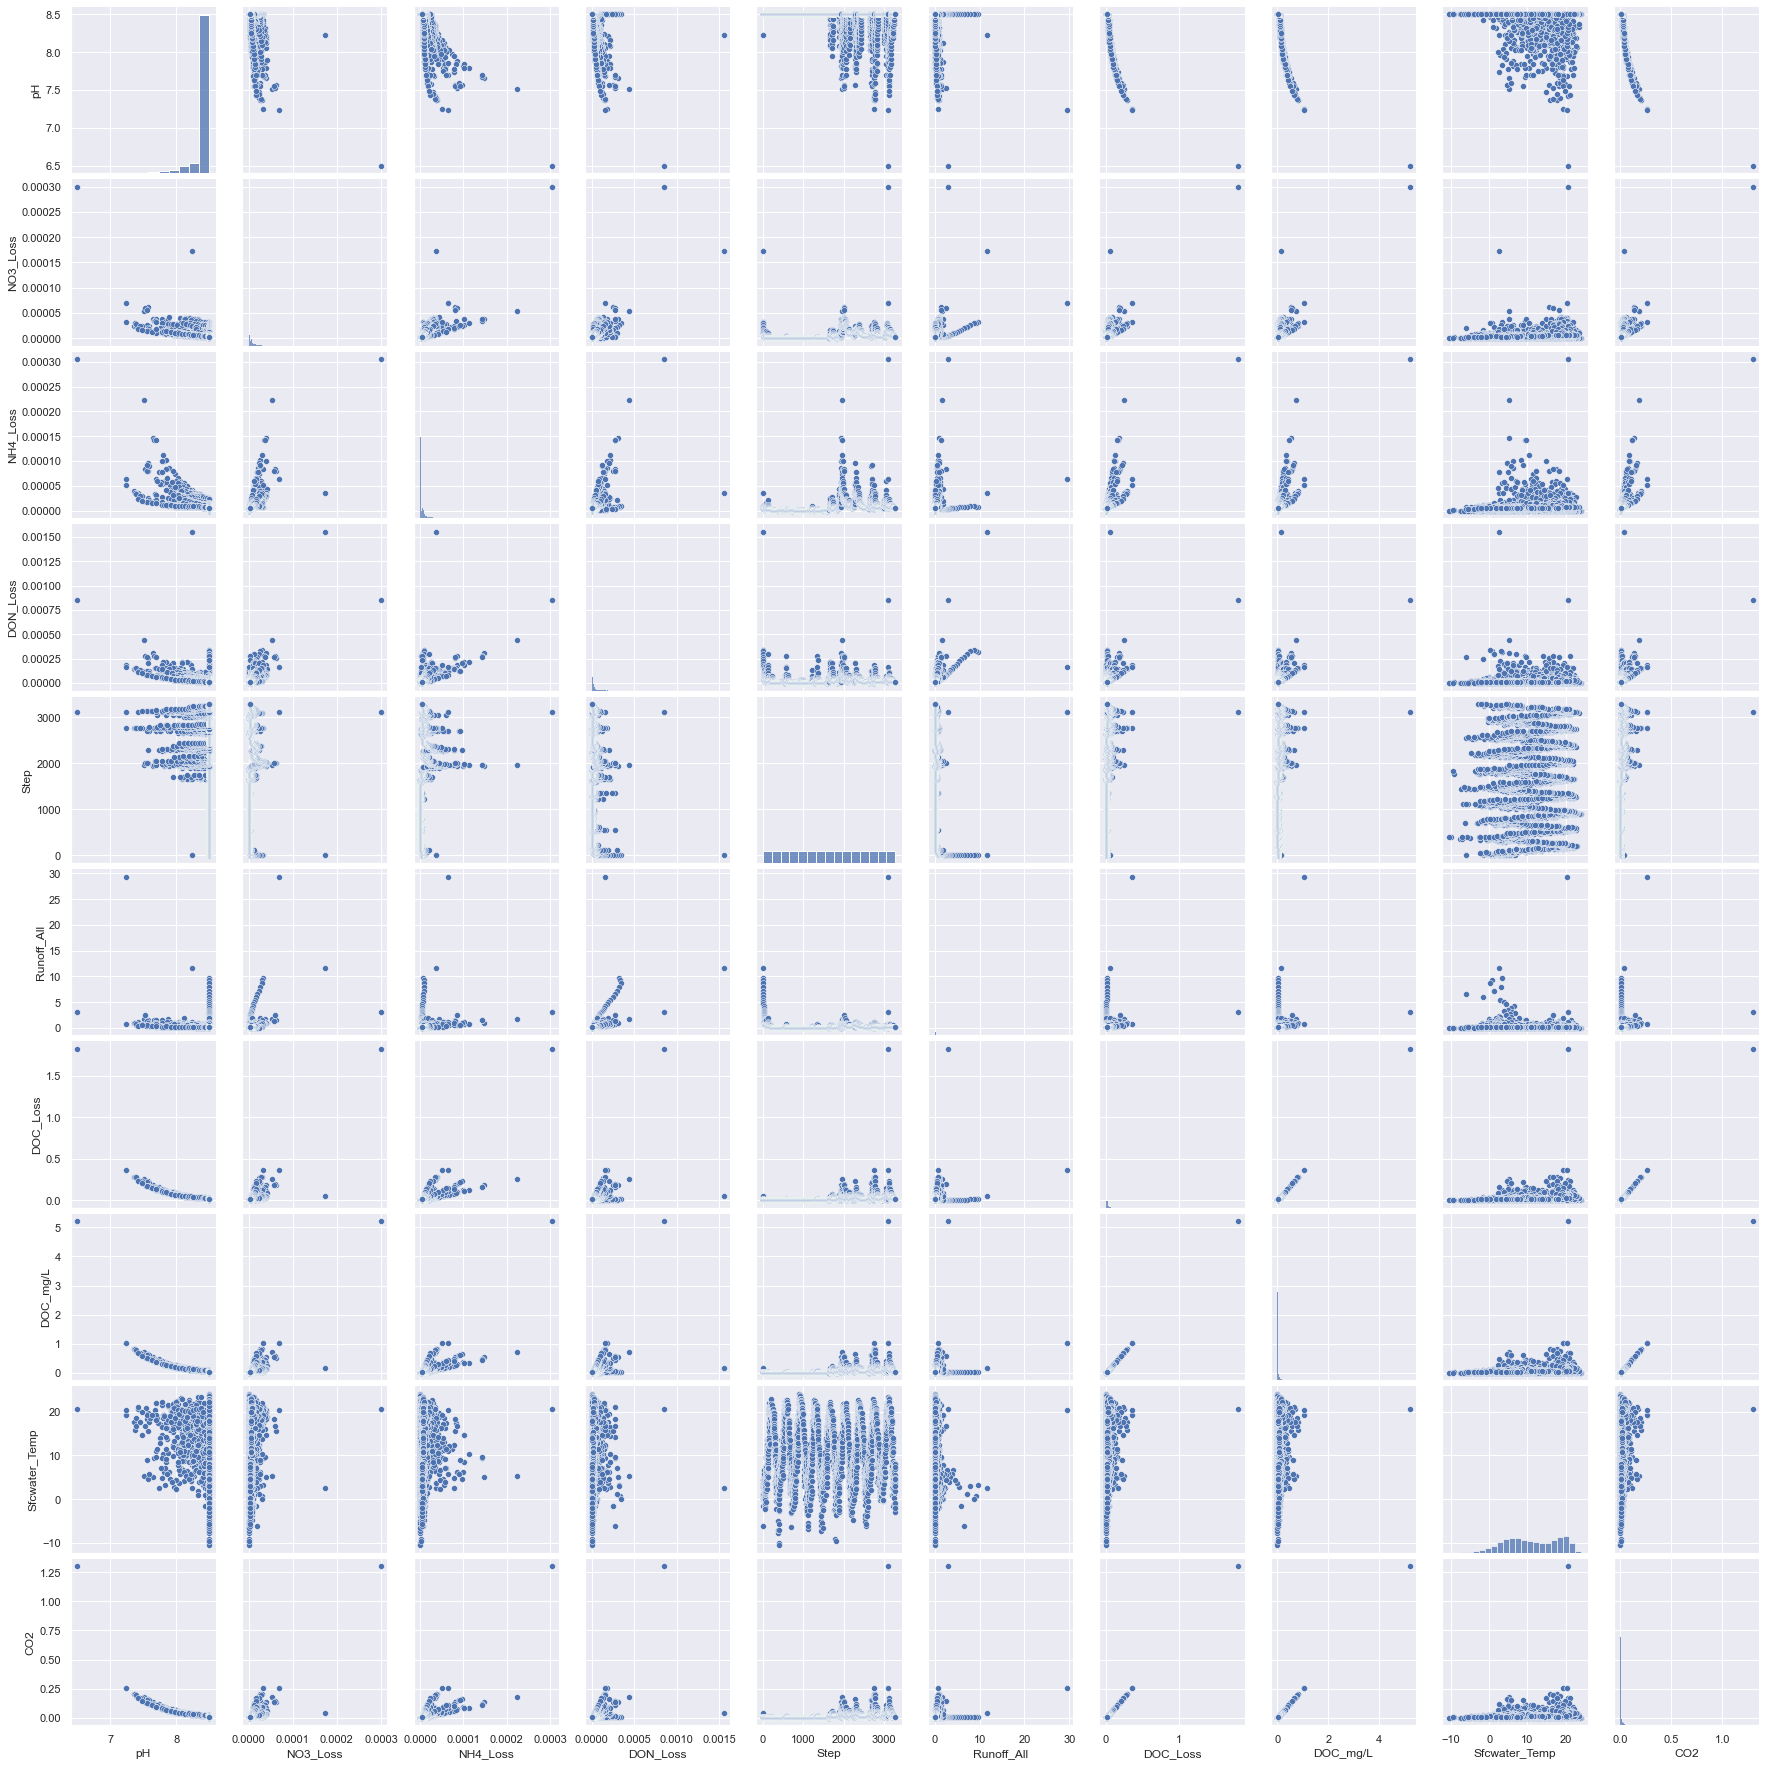

In [35]:
sns.pairplot(data_2.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);

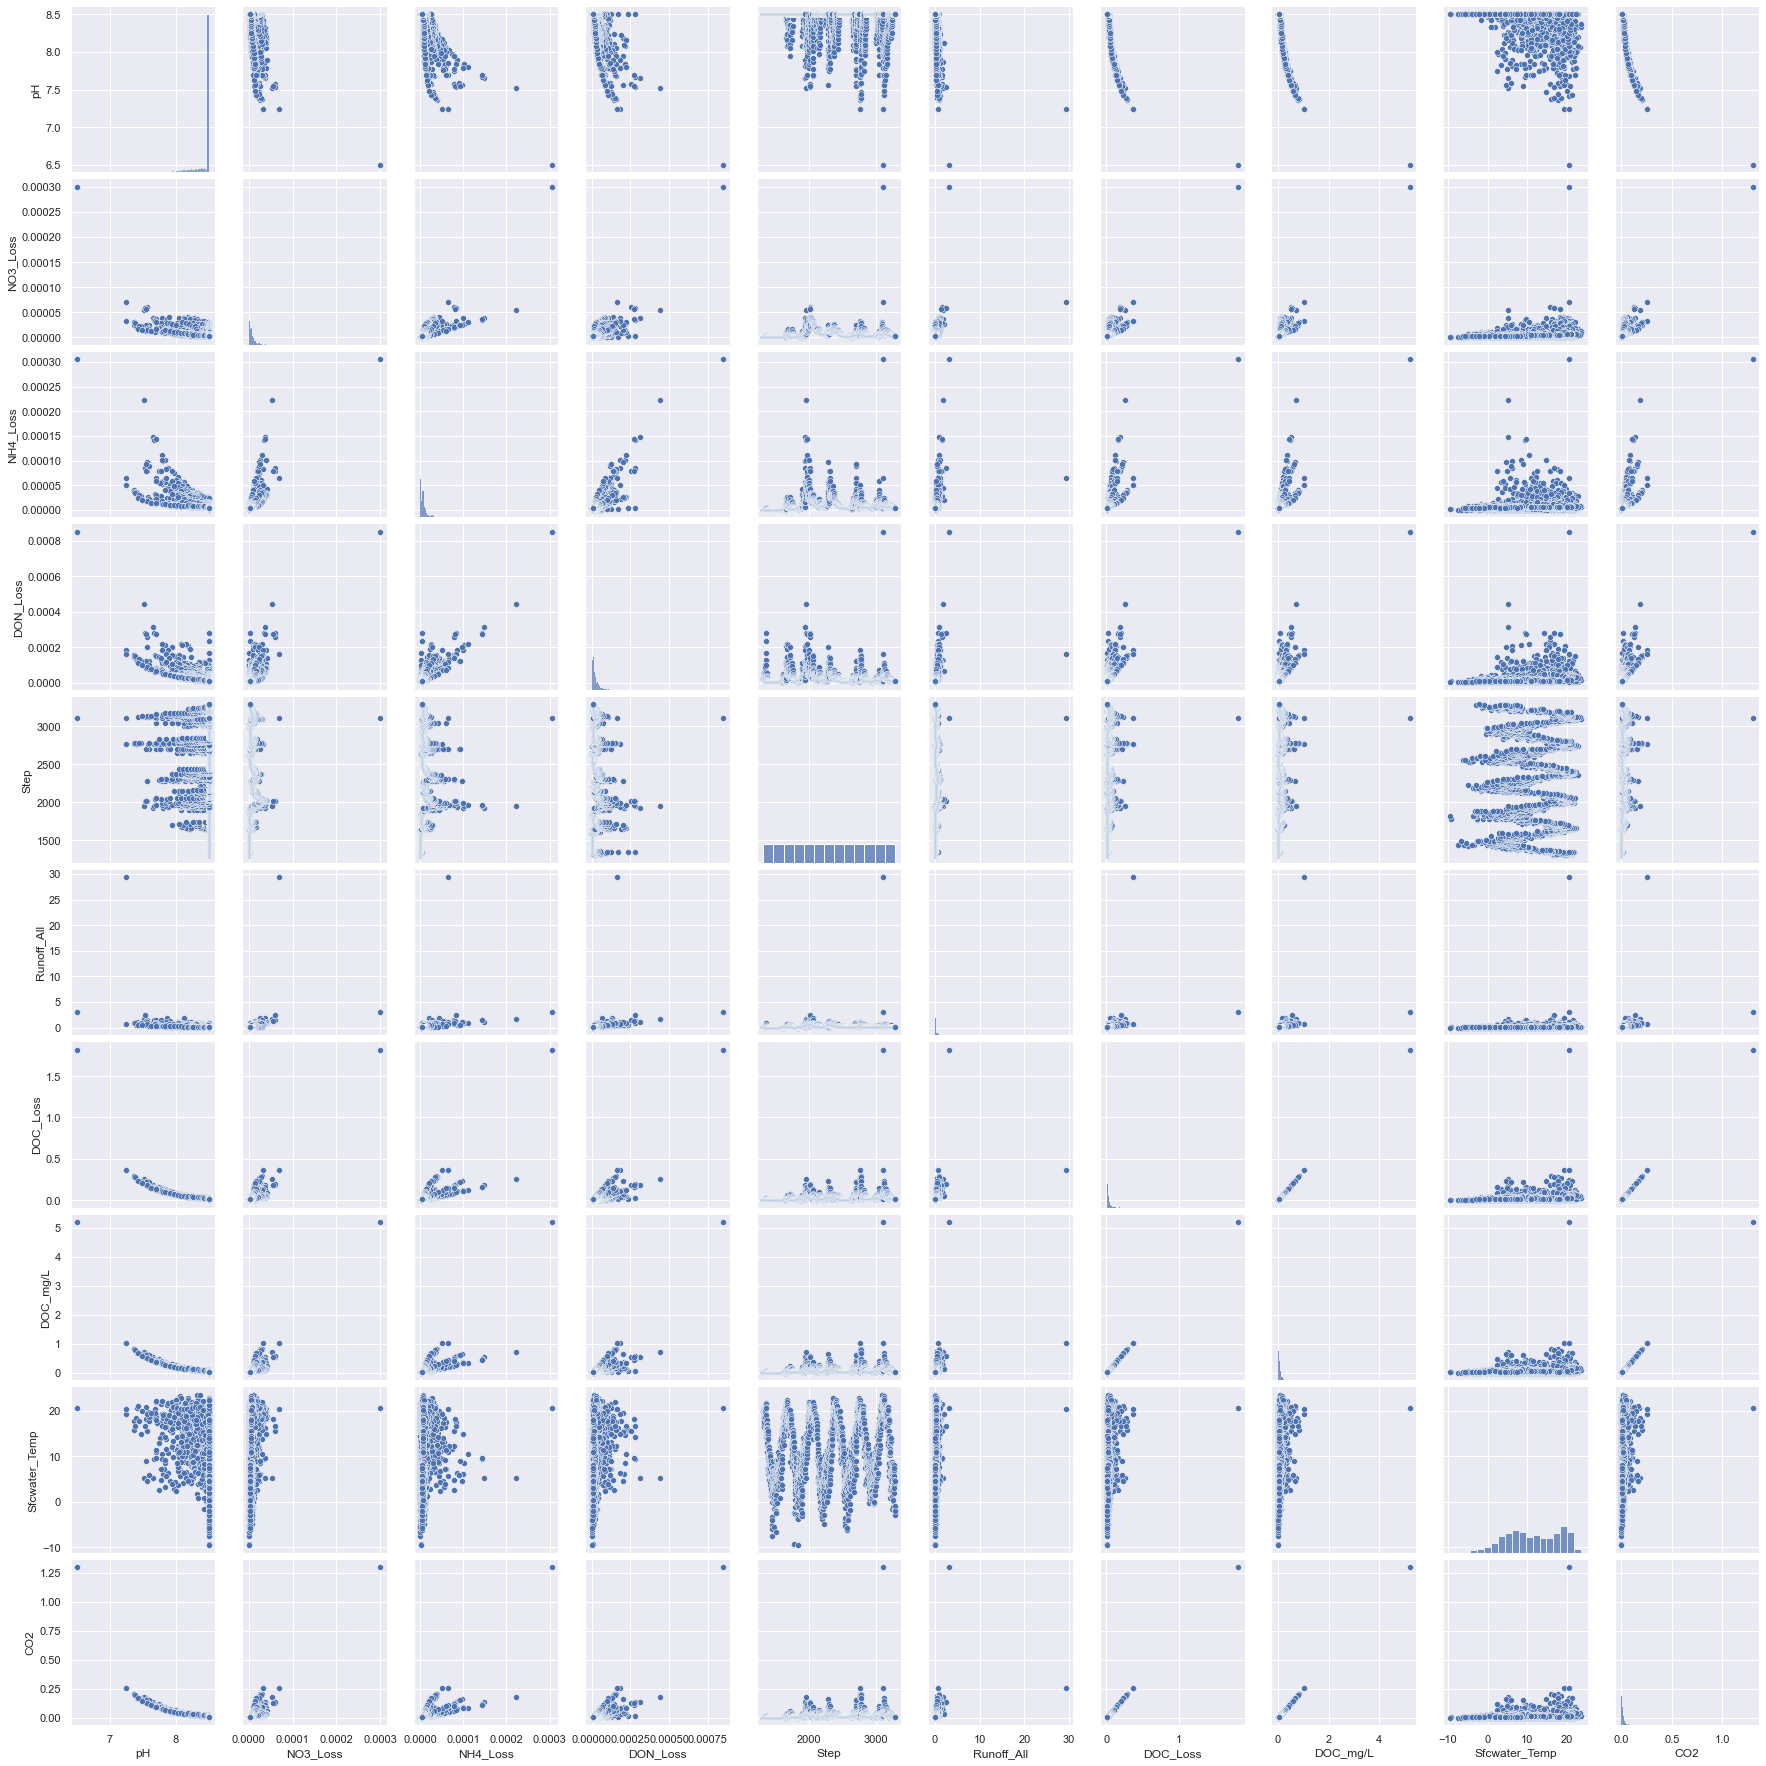

In [36]:
sns.pairplot(df_di_a.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);

In [37]:
import numpy as np

In [38]:
perc = [.10, .25, .5, .75, .90]; print(type(perc));

<class 'list'>


In [39]:
data_2.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean      8.439063                            4.429088e-06   
std       0.163764                            9.098820e-06   
min       6.500062                            6.078645e-10   
10%       8.257485                            2.022193e-08   
25%       8.500000                            5.444414e-08   
50%       8.500000                            1.405365e-06   
75%       8.500000                            5.927934e-06   
90%       8.500000                            1.304791e-05   
max       8.500000                            2.999136e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             6.601599e-06   
std                              1.325734e-05   
min                              6.251203e-08   
10%                              9.847706e-08   
25%                              1.837206e-07   
50%                              2.510358e-06   
75%                              7.793907e-06   
90%                              1.576521e-05   
max                              3.049862e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             2.197756e-05   
std                              4.630453e-05   
min                              4.437417e-07   
10%                              1.254997e-06   
25%                              2.938069e-06   
50%                              1.042756e-05   
75%                              2.403923e-05   
90%                              5.031524e-05   
max                              1.554523e-03   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.192166   
std                                 0.731214   
min                                 0.002260   
10%                                 0.003516   
25%                                 0.009843   
50%                                 0.066563   
75%                                 0.182819   
90%                                 0.469919   
max                                29.388712   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.015237     0.043535         11.248536   
std                                  0.042300     0.120858          6.931090   
min                                  0.000029     0.000084        -10.562500   
10%                                  0.000075     0.000214          2.262500   
25%                                  0.000193     0.000551          5.787500   
50%                                  0.003675     0.010501         11.112499   
75%                                  0.019601     0.056002         17.712502   
90%                                  0.038432     0.109807         20.412498   
max                                  1.820812     5.202320         24.087502   

               CO2  
count  3287.000000  
mean      0.010884  
std       0.030214  
min       0.000021  
10%       0.000054  
25%       0.000138  
50%       0.002625  
75%       0.014000  
90%       0.027452  
max       1.300580

In [40]:
df_di_a.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000                            1.978000e+03   
mean      8.398872                            6.963579e-06   
std       0.201199                            1.015898e-05   
min       6.500062                            7.904396e-08   
10%       8.124098                            8.898826e-08   
25%       8.379265                            1.904871e-06   
50%       8.500000                            4.463034e-06   
75%       8.500000                            8.709939e-06   
90%       8.500000                            1.657799e-05   
max       8.500000                            2.999136e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.053342e-05   
std                              1.584812e-05   
min                              8.243388e-08   
10%                              2.330551e-07   
25%                              3.370344e-06   
50%                              6.725040e-06   
75%                              1.147453e-05   
90%                              2.464874e-05   
max                              3.049862e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             2.694855e-05   
std                              3.967425e-05   
min                              9.759431e-07   
10%                              3.485663e-06   
25%                              7.957249e-06   
50%                              1.547219e-05   
75%                              3.133558e-05   
90%                              5.784424e-05   
max                              8.512222e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.205125   
std                                 0.697596   
min                                 0.002260   
10%                                 0.005910   
25%                                 0.051539   
50%                                 0.115309   
75%                                 0.229124   
90%                                 0.496839   
max                                29.388712   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.024917     0.071193         11.347358   
std                                  0.052309     0.149454          6.693310   
min                                  0.000075     0.000215         -9.512501   
10%                                  0.000296     0.000844          2.765000   
25%                                  0.005058     0.014451          6.162500   
50%                                  0.015222     0.043491         11.300000   
75%                                  0.029669     0.084769         17.562500   
90%                                  0.051423     0.146923         20.037498   
max                                  1.820812     5.202320         23.487500   

               CO2  
count  1978.000000  
mean      0.017798  
std       0.037364  
min       0.000054  
10%       0.000211  
25%       0.003613  
50%       0.010873  
75%       0.021192  
90%       0.036731  
max       1.300580

In [41]:
df_di_a.loc[df_di_a['Condition'] == 'Prefire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  313.0                            3.130000e+02   
mean     8.5                            1.711340e-07   
std      0.0                            2.815744e-07   
min      8.5                            7.904396e-08   
10%      8.5                            7.985057e-08   
25%      8.5                            8.054734e-08   
50%      8.5                            8.301139e-08   
75%      8.5                            1.400060e-07   
90%      8.5                            3.296985e-07   
max      8.5                            2.944976e-06   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             2.808731e-07   
std                              3.906304e-07   
min                              8.243388e-08   
10%                              9.172053e-08   
25%                              1.186765e-07   
50%                              1.764861e-07   
75%                              2.885262e-07   
90%                              4.967477e-07   
max                              4.030671e-06   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.067081e-05   
std                              2.678700e-05   
min                              9.759431e-07   
10%                              1.095221e-06   
25%                              1.272343e-06   
50%                              2.550582e-06   
75%                              8.832146e-06   
90%                              2.546751e-05   
max                              2.804605e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.022621   
std                                 0.069064   
min                                 0.002260   
10%                                 0.002363   
25%                                 0.002524   
50%                                 0.004108   
75%                                 0.014629   
90%                                 0.049896   
max                                 0.794726   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000837    0.002393          9.384385   
std                                  0.002104    0.006012          6.408665   
min                                  0.000075    0.000215         -7.412499   
10%                                  0.000085    0.000242          2.187500   
25%                                  0.000099    0.000283          5.037500   
50%                                  0.000199    0.000569          8.112500   
75%                                  0.000712    0.002033         14.787500   
90%                                  0.002032    0.005806         18.687500   
max                                  0.022092    0.063120         21.612500   

              CO2  
count  313.000000  
mean     0.000598  
std      0.001503  
min      0.000054  
10%      0.000060  
25%      0.000071  
50%      0.000142  
75%      0.000508  
90%      0.001451  
max      0.015780

In [42]:
df_di_a.loc[df_di_a['Condition'] == 'Postfire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                            1.665000e+03   
mean      8.379861                            8.240478e-06   
std       0.214033                            1.059684e-05   
min       6.500062                            3.057608e-07   
10%       8.086487                            1.820136e-06   
25%       8.324025                            2.747171e-06   
50%       8.500000                            5.546185e-06   
75%       8.500000                            1.076684e-05   
90%       8.500000                            1.766663e-05   
max       8.500000                            2.999136e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.246077e-05   
std                              1.657978e-05   
min                              6.142470e-07   
10%                              3.300678e-06   
25%                              5.201895e-06   
50%                              7.550189e-06   
75%                              1.298637e-05   
90%                              2.705778e-05   
max                              3.049862e-04   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                             1665.000000   
mean                                 0.000030   
std                                  0.000041   
min                                  0.000003   
10%                                  0.000006   
25%                                  0.000010   
50%                                  0.000018   
75%                                  0.000035   
90%                                  0.000064   
max                                  0.000851   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.239434   
std                                 0.754877   
min                                 0.009465   
10%                                 0.041613   
25%                                 0.077913   
50%                                 0.143882   
75%                                 0.264865   
90%                                 0.530191   
max                                29.388712   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.029444     0.084126         11.716374   
std                                  0.055862     0.159604          6.683227   
min                                  0.001481     0.004232         -9.512501   
10%                                  0.004833     0.013808          3.012500   
25%                                  0.010270     0.029342          6.462500   
50%                                  0.019246     0.054988         11.712500   
75%                                  0.033182     0.094804         18.012500   
90%                                  0.056725     0.162071         20.187500   
max                                  1.820812     5.202320         23.487500   

               CO2  
count  1665.000000  
mean      0.021032  
std       0.039901  
min       0.001058  
10%       0.003452  
25%       0.007336  
50%       0.013747  
75%       0.023701  
90%       0.040518  
max       1.300580

In [43]:
df_pools_dif = pools_di.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Sfcwater_Temp_C', 'CO2',
       'DOC_mg/L', 'CO2_calc', 'pH_calc_200', 'Criteria', 'Condition'})

In [44]:
df_di_a.describe()

pH_1T   Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.398872  2297.500000                            6.963579e-06   
std       0.201199   571.143736                            1.015898e-05   
min       6.500062  1309.000000                            7.904396e-08   
25%       8.379265  1803.250000                            1.904871e-06   
50%       8.500000  2297.500000                            4.463034e-06   
75%       8.500000  2791.750000                            8.709939e-06   
max       8.500000  3286.000000                            2.999136e-04   

              Year  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000                            1.978000e+03   
mean   2003.769464                            1.053342e-05   
std       1.576393                            1.584812e-05   
min    2001.000000                            8.243388e-08   
25%    2002.000000                            3.370344e-06   
50%    2004.000000                            6.725040e-06   
75%    2005.000000                            1.147453e-05   
max    2006.000000                            3.049862e-04   

       DON_Loss(gN/day/m2)_Delineated_Average         Step  \
count                            1.978000e+03  1978.000000   
mean                             2.694855e-05  2297.500000   
std                              3.967425e-05   571.143736   
min                              9.759431e-07  1309.000000   
25%                              7.957249e-06  1803.250000   
50%                              1.547219e-05  2297.500000   
75%                              3.133558e-05  2791.750000   
max                              8.512222e-04  3286.000000   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.205125   
std                                 0.697596   
min                                 0.002260   
25%                                 0.051539   
50%                                 0.115309   
75%                                 0.229124   
max                                29.388712   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.024917     0.071193         11.347358   
std                                  0.052309     0.149454          6.693310   
min                                  0.000075     0.000215         -9.512501   
25%                                  0.005058     0.014451          6.162500   
50%                                  0.015222     0.043491         11.300000   
75%                                  0.029669     0.084769         17.562500   
max                                  1.820812     5.202320         23.487500   

               CO2  Alk_140  
count  1978.000000   1978.0  
mean      0.017798    140.0  
std       0.037364      0.0  
min       0.000054    140.0  
25%       0.003613    140.0  
50%       0.010873    140.0  
75%       0.021192    140.0  
max       1.300580    140.0

In [45]:
df_di_a_lr = df_di_a.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(df_di_a.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})



In [46]:
df_di_a_lr

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average         Year  \
slope     -8.431580e-05                            2.069821e-09     0.002713   
intercept  8.592587e+00                            2.208165e-06  1997.536209   
rvalue    -2.393478e-01                            1.163665e-01     0.982970   
p-value    3.615783e-27                            2.105928e-07     0.000000   
stderr     7.694418e-06                            3.974210e-10     0.000011   

           NH4_Loss(gN/day/m2)_Delineated_Average  \
slope                                2.522904e-09   
intercept                            4.737045e-06   
rvalue                               9.092187e-02   
p-value                              5.131459e-05   
stderr                               6.216362e-10   

           DON_Loss(gN/day/m2)_Delineated_Average  Step  \
slope                               -4.553940e-09   1.0   
intercept                            3.741122e-05   0.0   
rvalue                              -6.555774e-02   1.0   
p-value                              3.534647e-03   0.0   
stderr                               1.559318e-09   0.0   

           Runoff_All(mm/day)_Delineated_Average  \
slope                                   0.000071   
intercept                               0.042412   
rvalue                                  0.057984   
p-value                                 0.009898   
stderr                                  0.000027   

           DOC_Loss(gC/day/m2)_Delineated_Average      DOC_mg/L  \
slope                                1.974821e-05  5.642345e-05   
intercept                           -2.045402e-02 -5.844007e-02   
rvalue                               2.156240e-01  2.156240e-01   
p-value                              3.073130e-22  3.073130e-22   
stderr                               2.011865e-06  5.748187e-06   

           Sfc_Water_Temp_C           CO2  Alk_140  
slope              0.000758  1.410586e-05      0.0  
intercept          9.606002 -1.461002e-02    140.0  
rvalue             0.064675  2.156240e-01      0.0  
p-value            0.004007  3.073130e-22      1.0  
stderr             0.000263  1.437047e-06      0.0

In [1]:
df_pools_dif.head()

NameError: name 'df_pools_dif' is not defined

In [57]:
df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average']; 
df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'];
df_di_a['NO3_Pool'] = df_pools_dif['NO3_Pool(gN/m2)_Delineated_Average']

<ipython-input-57-5a278c380552>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'];
<ipython-input-57-5a278c380552>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'];
<ipython-input-57-5a278c380552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [58]:
df_di_a['Criteria'] = str('Meets')

<ipython-input-58-63546f0ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['Criteria'] = str('Meets')


In [59]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.398872  2297.500000                            6.963579e-06   
std       0.201199   571.143736                            1.015898e-05   
min       6.500062  1309.000000                            7.904396e-08   
10%       8.124098  1506.700000                            8.898826e-08   
25%       8.379265  1803.250000                            1.904871e-06   
50%       8.500000  2297.500000                            4.463034e-06   
75%       8.500000  2791.750000                            8.709939e-06   
90%       8.500000  3088.300000                            1.657799e-05   
max       8.500000  3286.000000                            2.999136e-04   

              Year  NH4_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000                            1.978000e+03   
mean   2003.769464                            1.053342e-05   
std       1.576393                            1.584812e-05   
min    2001.000000                            8.243388e-08   
10%    2002.000000                            2.330551e-07   
25%    2002.000000                            3.370344e-06   
50%    2004.000000                            6.725040e-06   
75%    2005.000000                            1.147453e-05   
90%    2006.000000                            2.464874e-05   
max    2006.000000                            3.049862e-04   

       DON_Loss(gN/day/m2)_Delineated_Average         Step  \
count                            1.978000e+03  1978.000000   
mean                             2.694855e-05  2297.500000   
std                              3.967425e-05   571.143736   
min                              9.759431e-07  1309.000000   
10%                              3.485663e-06  1506.700000   
25%                              7.957249e-06  1803.250000   
50%                              1.547219e-05  2297.500000   
75%                              3.133558e-05  2791.750000   
90%                              5.784424e-05  3088.300000   
max                              8.512222e-04  3286.000000   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.205125   
std                                 0.697596   
min                                 0.002260   
10%                                 0.005910   
25%                                 0.051539   
50%                                 0.115309   
75%                                 0.229124   
90%                                 0.496839   
max                                29.388712   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.024917     0.071193         11.347358   
std                                  0.052309     0.149454          6.693310   
min                                  0.000075     0.000215         -9.512501   
10%                                  0.000296     0.000844          2.765000   
25%                                  0.005058     0.014451          6.162500   
50%                                  0.015222     0.043491         11.300000   
75%                                  0.029669     0.084769         17.562500   
90%                                  0.051423     0.146923         20.037498   
max                                  1.820812     5.202320         23.487500   

               CO2  Alk_140     DOC_Pool    NH4_Pool    NO3_Pool  
count  1978.000000   1978.0   669.000000  669.000000  669.000000  
mean      0.017798    140.0  1121.676181    1.730085    0.727548  
std       0.037364      0.0   152.445667    0.444525    0.203238  
min       0.000054    140.0   864.228027    1.143683    0.373533  
10%       0.000211    140.0   891.940161    1.194432    0.392437  
25%      

In [60]:
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [61]:
criteria_mask = df_di_a[((df_di_a['NH4_Pool'] > 0.569) & (df_di_a['pH_1T'] == 8.5) | ((df_di_a['NH4_Pool'] >  1.27) & (df_di_a['pH_1T'] == 8.0)) | (df_di_a['NO3_Pool'] > 1.59))];

In [62]:
criteria_mask

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Year  \
1309    8.5        1309                            2.677494e-07  2001   
1310    8.5        1310                            3.472516e-07  2001   
1311    8.5        1311                            4.345665e-07  2001   
1312    8.5        1312                            3.428827e-07  2001   
1313    8.5        1313                            2.838185e-07  2001   
...     ...         ...                                     ...   ...   
1929    8.5        1929                            2.179495e-06  2003   
1930    8.5        1930                            2.052741e-06  2003   
1931    8.5        1931                            4.504514e-06  2003   
1939    8.5        1939                            5.200221e-06  2003   
1940    8.5        1940                            4.615850e-06  2003   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.684104e-07   
1310                            3.533252e-07   
1311                            4.222566e-07   
1312                            3.216673e-07   
1313                            2.650185e-07   
...                                      ...   
1929                            7.531745e-06   
1930                            7.015336e-06   
1931                            1.624688e-05   
1939                            1.925762e-05   
1940                            1.691440e-05   

      DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1309                                0.000018  1309   
1310                                0.000024  1310   
1311                                0.000031  1311   
1312                                0.000023  1312   
1313                                0.000019  1313   
...                                      ...   ...   
1929                                0.000017  1929   
1930                                0.000016  1930   
1931                                0.000035  1931   
1939                                0.000043  1939   
1940                                0.000038  1940   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033263   
1310                               0.049179   
1311                               0.059759   
1312                               0.043197   
1313                               0.033944   
...                                     ...   
1929                               0.037227   
1930                               0.034364   
1931                               0.230934   
1939                               0.125236   
1940                               0.112872   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.001380  0.003941         20.112500   
1310                                0.001843  0.005267         19.737500   
1311                                0.002381  0.006804         19.962502   
1312                                0.001804  0.005153         19.812500   
1313                                0.001441  0.004116         19.287498   
...                                      ...       ...               ...   
1929                                0.009711  0.027745         13.137501   
1930                                0.009017  0.025764         10.887500   
1931                                0.020814  0.059468          6.012500   
1939                                0.023257  0.066448         10.587500   
1940                                0.020338  0.058107         11.487499   

           CO2  Alk_140 Condition Criteria     DOC_Pool  NH4_Pool  NO3_Pool  
1309  0.000985      140   Prefire    Meets   864.228027  1.813249  0.374558  
1310  0.001317      140   Prefire    Meets   864.513306  1.818525  0.374440  
1311  0.001701      140   Prefire    Meets   864.822266  1.823345  0.374330  
1312  0.001288      140   Prefire    Meets   864.942200  1.828272  0.374243  
1313  0.001029      140   Prefire  

In [54]:
df_di_a['Criteria'].loc[criteria_mask.index] = str('Exceeds')

C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [63]:
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [79]:
criteria_mask.drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('08092120APR21a_exceed_allstats.csv')

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  587.0                            5.870000e+02   
mean     8.5                            1.162725e-06   
std      0.0                            1.467620e-06   
min      8.5                            7.904396e-08   
10%      8.5                            8.020752e-08   
25%      8.5                            8.270301e-08   
50%      8.5                            3.732175e-07   
75%      8.5                            1.842958e-06   
90%      8.5                            3.261422e-06   
max      8.5                            6.921920e-06   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            5.870000e+02   
mean                             2.332890e-06   
std                              3.250892e-06   
min                              8.243388e-08   
10%                              1.097573e-07   
25%                              1.658176e-07   
50%                              6.142470e-07   
75%                              3.515602e-06   
90%                              6.863183e-06   
max                              1.925762e-05   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            5.870000e+02   
mean                             1.594528e-05   
std                              2.307983e-05   
min                              9.759431e-07   
10%                              1.195781e-06   
25%                              2.417724e-06   
50%                              9.192903e-06   
75%                              2.057650e-05   
90%                              3.865493e-05   
max                              2.804605e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             587.000000   
mean                                0.036170   
std                                 0.059935   
min                                 0.002260   
10%                                 0.002452   
25%                                 0.003875   
50%                                 0.018314   
75%                                 0.044562   
90%                                 0.096123   
max                                 0.794726   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              587.000000  587.000000        587.000000   
mean                                 0.004607    0.013163          9.864842   
std                                  0.005883    0.016809          6.648178   
min                                  0.000075    0.000215         -9.512501   
10%                                  0.000093    0.000265          1.857500   
25%                                  0.000190    0.000543          5.187500   
50%                                  0.001929    0.005512          9.012500   
75%                                  0.007138    0.020395         15.725001   
90%                                  0.013853    0.039579         18.912498   
max                                  0.024489    0.069968         22.287498   

          DOC_Pool    NH4_Pool    NO3_Pool  
count   587.000000  587.000000  587.000000  
mean   1100.064291    1.727412    0.709186  
std     144.416828    0.451844    0.202928  
min     864.228027    1.143683    0.373533  
10%     886.273694    1.186591    0.389432  
25%     992.812561    1.295464    0.645072  
50%    1104.323486    1.675201    0.661631  
75%    1193.768188    2.123486    0.931814  
90%    1321.456055    2.390341    0.983942  
max    1362.565918    2.570091    1.194570

In [80]:
criteria_mask.loc[criteria_mask['Condition'] == 'Prefire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('08092120APR21a_exceed_pfstats.csv')

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  313.0                            3.130000e+02   
mean     8.5                            1.711340e-07   
std      0.0                            2.815744e-07   
min      8.5                            7.904396e-08   
10%      8.5                            7.985057e-08   
25%      8.5                            8.054734e-08   
50%      8.5                            8.301139e-08   
75%      8.5                            1.400060e-07   
90%      8.5                            3.296985e-07   
max      8.5                            2.944976e-06   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             2.808731e-07   
std                              3.906304e-07   
min                              8.243388e-08   
10%                              9.172053e-08   
25%                              1.186765e-07   
50%                              1.764861e-07   
75%                              2.885262e-07   
90%                              4.967477e-07   
max                              4.030671e-06   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.067081e-05   
std                              2.678700e-05   
min                              9.759431e-07   
10%                              1.095221e-06   
25%                              1.272343e-06   
50%                              2.550582e-06   
75%                              8.832146e-06   
90%                              2.546751e-05   
max                              2.804605e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.022621   
std                                 0.069064   
min                                 0.002260   
10%                                 0.002363   
25%                                 0.002524   
50%                                 0.004108   
75%                                 0.014629   
90%                                 0.049896   
max                                 0.794726   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000837    0.002393          9.384385   
std                                  0.002104    0.006012          6.408665   
min                                  0.000075    0.000215         -7.412499   
10%                                  0.000085    0.000242          2.187500   
25%                                  0.000099    0.000283          5.037500   
50%                                  0.000199    0.000569          8.112500   
75%                                  0.000712    0.002033         14.787500   
90%                                  0.002032    0.005806         18.687500   
max                                  0.022092    0.063120         21.612500   

          DOC_Pool    NH4_Pool    NO3_Pool  
count   313.000000  313.000000  313.000000  
mean    994.372773    1.705023    0.578301  
std      89.071593    0.406550    0.131640  
min     864.228027    1.163976    0.373533  
10%     874.996533    1.218835    0.378054  
25%     898.641235    1.325875    0.415551  
50%    1005.466370    1.620493    0.645700  
75%    1085.671631    2.074030    0.667872  
90%    1101.737183    2.307369    0.691989  
max    1108.123047    2.420154    0.818616

In [81]:
criteria_mask.loc[criteria_mask['Condition'] == 'Postfire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Unnamed: 0', 'Step', 'Year'}).describe(percentiles=perc)#.to_csv('08092120APR21a_exceed_pofstats.csv')

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average  \
count  274.0                            2.740000e+02   
mean     8.5                            2.295456e-06   
std      0.0                            1.455231e-06   
min      8.5                            3.057608e-07   
10%      8.5                            7.838533e-07   
25%      8.5                            1.216415e-06   
50%      8.5                            1.962846e-06   
75%      8.5                            2.981176e-06   
90%      8.5                            4.410461e-06   
max      8.5                            6.921920e-06   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            2.740000e+02   
mean                             4.676983e-06   
std                              3.488271e-06   
min                              6.142470e-07   
10%                              1.453104e-06   
25%                              1.876716e-06   
50%                              3.828336e-06   
75%                              6.620313e-06   
90%                              8.801678e-06   
max                              1.925762e-05   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                              274.000000   
mean                                 0.000022   
std                                  0.000016   
min                                  0.000005   
10%                                  0.000007   
25%                                  0.000010   
50%                                  0.000016   
75%                                  0.000031   
90%                                  0.000046   
max                                  0.000082   

       Runoff_All(mm/day)_Delineated_Average  \
count                             274.000000   
mean                                0.051647   
std                                 0.042527   
min                                 0.009465   
10%                                 0.013929   
25%                                 0.020385   
50%                                 0.033749   
75%                                 0.074992   
90%                                 0.116025   
max                                 0.230934   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              274.000000  274.000000        274.000000   
mean                                 0.008913    0.025467         10.413686   
std                                  0.005859    0.016739          6.882385   
min                                  0.001481    0.004232         -9.512501   
10%                                  0.002521    0.007203          1.497500   
25%                                  0.003929    0.011224          5.731250   
50%                                  0.007493    0.021409         10.100000   
75%                                  0.012658    0.036165         16.812500   
90%                                  0.017974    0.051354         19.069999   
max                                  0.024489    0.069968         22.287498   

          DOC_Pool    NH4_Pool    NO3_Pool  
count   274.000000  274.000000  274.000000  
mean   1220.799491    1.752988    0.858701  
std      90.902926    0.498110    0.162821  
min    1108.429688    1.143683    0.645018  
10%    1113.426050    1.176270    0.645285  
25%    1128.715851    1.244453    0.652295  
50%    1206.496826    1.776720    0.940943  
75%    1310.121490    2.199311    0.980835  
90%    1352.733606    2.482892    0.997216  
max    1362.565918    2.570091    1.194570

In [91]:
bc_pf = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head()

pH_1T  Unnamed: 0  NO3_Loss(gN/day/m2)_Delineated_Average  Year  \
1309    8.5        1309                            2.677494e-07  2001   
1310    8.5        1310                            3.472516e-07  2001   
1311    8.5        1311                            4.345665e-07  2001   
1312    8.5        1312                            3.428827e-07  2001   
1313    8.5        1313                            2.838185e-07  2001   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.684104e-07   
1310                            3.533252e-07   
1311                            4.222566e-07   
1312                            3.216673e-07   
1313                            2.650185e-07   

      DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1309                                0.000018  1309   
1310                                0.000024  1310   
1311                                0.000031  1311   
1312                                0.000023  1312   
1313                                0.000019  1313   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033263   
1310                               0.049179   
1311                               0.059759   
1312                               0.043197   
1313                               0.033944   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.001380  0.003941         20.112500   
1310                                0.001843  0.005267         19.737500   
1311                                0.002381  0.006804         19.962502   
1312                                0.001804  0.005153         19.812500   
1313                                0.001441  0.004116         19.287498   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  
1309  0.000985      140   Prefire    Meets  864.228027  1.813249  0.374558  
1310  0.001317      140   Prefire    Meets  864.513306  1.818525  0.374440  
1311  0.001701      140   Prefire    Meets  864.822266  1.823345  0.374330  
1312  0.001288      140   Prefire    Meets  864.942200  1.828272  0.374243  
1313  0.001029      140   Prefire    Meets  865.053162  1.833088  0.374158

In [92]:
bc_pf_lr = bc_pf.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(bc_pf.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [97]:
 stats.f_oneway(bc_pf['NO3_Pool'], bc_pof['NO3_Pool'])

F_onewayResult(statistic=nan, pvalue=nan)

In [93]:
bc_pf_lr

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average          Year  \
slope        0.0                           -1.105385e-09  4.788419e-03   
intercept    8.5                            1.790523e-06  1.994499e+03   
rvalue       0.0                           -3.552766e-01  8.656717e-01   
p-value      1.0                            9.625646e-11  1.829381e-95   
stderr       0.0                            1.649177e-10  1.570218e-04   

           NH4_Loss(gN/day/m2)_Delineated_Average  \
slope                               -2.007815e-10   
intercept                            5.750180e-07   
rvalue                              -4.651618e-02   
p-value                              4.121553e-01   
stderr                               2.444945e-10   

           DON_Loss(gN/day/m2)_Delineated_Average  Step  \
slope                               -9.037364e-08   1.0   
intercept                            1.430682e-04   0.0   
rvalue                              -3.053262e-01   1.0   
p-value                              3.540841e-08   0.0   
stderr                               1.598260e-08   0.0   

           Runoff_All(mm/day)_Delineated_Average  \
slope                              -2.120884e-04   
intercept                           3.333308e-01   
rvalue                             -2.779142e-01   
p-value                             5.856438e-07   
stderr                              4.156917e-05   

           DOC_Loss(gC/day/m2)_Delineated_Average      DOC_mg/L  \
slope                               -6.978568e-06 -1.993876e-05   
intercept                            1.106110e-02  3.160314e-02   
rvalue                              -3.001252e-01 -3.001252e-01   
p-value                              6.169231e-08  6.169231e-08   
stderr                               1.257727e-06  3.593506e-06   

           Sfc_Water_Temp_C           CO2  Alk_140       DOC_Pool  \
slope         -1.946139e-02 -4.984691e-06      0.0   9.662848e-01   
intercept      3.789533e+01  7.900785e-03    140.0  -4.212345e+02   
rvalue        -2.748228e-01 -3.001252e-01      0.0   9.817758e-01   
p-value        7.890123e-07  6.169231e-08      1.0  2.432507e-226   
stderr         3.860895e-03  8.983766e-07      0.0   1.060631e-02   

               NH4_Pool      NO3_Pool  
slope     -2.977153e-03  1.116638e-03  
intercept  6.066553e+00 -1.057573e+00  
rvalue    -6.627253e-01  7.676607e-01  
p-value    5.904596e-41  4.695603e-62  
stderr     1.907610e-04  5.285958e-05

In [100]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head();bc_pf.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average         Year  \
count  313.0                            3.130000e+02   313.000000   
mean     8.5                            1.711340e-07  2001.514377   
std      0.0                            2.815744e-07     0.500594   
min      8.5                            7.904396e-08  2001.000000   
10%      8.5                            7.985057e-08  2001.000000   
25%      8.5                            8.054734e-08  2001.000000   
50%      8.5                            8.301139e-08  2002.000000   
75%      8.5                            1.400060e-07  2002.000000   
90%      8.5                            3.296985e-07  2002.000000   
max      8.5                            2.944976e-06  2002.000000   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             2.808731e-07   
std                              3.906304e-07   
min                              8.243388e-08   
10%                              9.172053e-08   
25%                              1.186765e-07   
50%                              1.764861e-07   
75%                              2.885262e-07   
90%                              4.967477e-07   
max                              4.030671e-06   

       DON_Loss(gN/day/m2)_Delineated_Average        Step  \
count                            3.130000e+02   313.00000   
mean                             1.067081e-05  1465.00000   
std                              2.678700e-05    90.49954   
min                              9.759431e-07  1309.00000   
10%                              1.095221e-06  1340.20000   
25%                              1.272343e-06  1387.00000   
50%                              2.550582e-06  1465.00000   
75%                              8.832146e-06  1543.00000   
90%                              2.546751e-05  1589.80000   
max                              2.804605e-04  1621.00000   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.022621   
std                                 0.069064   
min                                 0.002260   
10%                                 0.002363   
25%                                 0.002524   
50%                                 0.004108   
75%                                 0.014629   
90%                                 0.049896   
max                                 0.794726   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000837    0.002393          9.384385   
std                                  0.002104    0.006012          6.408665   
min                                  0.000075    0.000215         -7.412499   
10%                                  0.000085    0.000242          2.187500   
25%                                  0.000099    0.000283          5.037500   
50%                                  0.000199    0.000569          8.112500   
75%                                  0.000712    0.002033         14.787500   
90%                                  0.002032    0.005806         18.687500   
max                                  0.022092    0.063120         21.612500   

              CO2  Alk_140     DOC_Pool    NH4_Pool    NO3_Pool  
count  313.000000    313.0   313.000000  313.000000  313.000000  
mean     0.000598    140.0   994.372773    1.705023    0.578301  
std      0.001503      0.0    89.071593    0.406550    0.131640  
min      0.000054    140.0   864.228027    1.163976    0.373533  
10%      0.000060    140.0   874.996533    1.218835    0.378054  
25%      0.000071    140.0   898.641235    1.325875    0.415551  
50%      0.000142    140.0  1005.466370    1.620493    0.645700  
75%      0.000508    140.0  1085.671631    2.074030    0.667872  
90%      0.001451    140.0  1101.737183   

In [99]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Postfire']; bc_pof.head();bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average         Year  \
count  1665.000000                            1.665000e+03  1665.000000   
mean      8.379861                            8.240478e-06  2004.193393   
std       0.214033                            1.059684e-05     1.330063   
min       6.500062                            3.057608e-07  2002.000000   
10%       8.086487                            1.820136e-06  2002.000000   
25%       8.324025                            2.747171e-06  2003.000000   
50%       8.500000                            5.546185e-06  2004.000000   
75%       8.500000                            1.076684e-05  2005.000000   
90%       8.500000                            1.766663e-05  2006.000000   
max       8.500000                            2.999136e-04  2006.000000   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.246077e-05   
std                              1.657978e-05   
min                              6.142470e-07   
10%                              3.300678e-06   
25%                              5.201895e-06   
50%                              7.550189e-06   
75%                              1.298637e-05   
90%                              2.705778e-05   
max                              3.049862e-04   

       DON_Loss(gN/day/m2)_Delineated_Average         Step  \
count                             1665.000000  1665.000000   
mean                                 0.000030  2454.000000   
std                                  0.000041   480.788415   
min                                  0.000003  1622.000000   
10%                                  0.000006  1788.400000   
25%                                  0.000010  2038.000000   
50%                                  0.000018  2454.000000   
75%                                  0.000035  2870.000000   
90%                                  0.000064  3119.600000   
max                                  0.000851  3286.000000   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.239434   
std                                 0.754877   
min                                 0.009465   
10%                                 0.041613   
25%                                 0.077913   
50%                                 0.143882   
75%                                 0.264865   
90%                                 0.530191   
max                                29.388712   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.029444     0.084126         11.716374   
std                                  0.055862     0.159604          6.683227   
min                                  0.001481     0.004232         -9.512501   
10%                                  0.004833     0.013808          3.012500   
25%                                  0.010270     0.029342          6.462500   
50%                                  0.019246     0.054988         11.712500   
75%                                  0.033182     0.094804         18.012500   
90%                                  0.056725     0.162071         20.187500   
max                                  1.820812     5.202320         23.487500   

               CO2  Alk_140     DOC_Pool    NH4_Pool    NO3_Pool  
count  1665.000000   1665.0   356.000000  356.000000  356.000000  
mean      0.021032    140.0  1233.603053    1.752119    0.858767  
std       0.039901      0.0    99.525858    0.474893    0.159962  
min       0.001058    140.0  1108.429688    1.143683    0.645007  
10%       0.003452    140.0  1115.049988    1.179749    0.645245  
25%       0.007336    140.0  1129.225037    1.288292    0.652962  
50%       0.013747    140.0  1224.877441    1.666887    0.951078  
75%       0.023701

In [95]:
bc_pof_lr = bc_pof.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(bc_pof.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [96]:
bc_pof_lr

pH_1T  NO3_Loss(gN/day/m2)_Delineated_Average         Year  \
slope     -5.997950e-05                           -1.988791e-09     0.002702   
intercept  8.527050e+00                            1.312097e-05  1997.562396   
rvalue    -1.347338e-01                           -9.023328e-02     0.976756   
p-value    3.413524e-08                            2.272049e-04     0.000000   
stderr     1.081688e-05                            5.382712e-10     0.000015   

           NH4_Loss(gN/day/m2)_Delineated_Average  \
slope                               -4.019783e-09   
intercept                            2.232532e-05   
rvalue                              -1.165676e-01   
p-value                              1.849907e-06   
stderr                               8.398619e-10   

           DON_Loss(gN/day/m2)_Delineated_Average  Step  \
slope                               -2.013493e-08   1.0   
intercept                            7.941969e-05   0.0   
rvalue                              -2.364386e-01   1.0   
p-value                              1.379276e-22   0.0   
stderr                               2.029056e-09   0.0   

           Runoff_All(mm/day)_Delineated_Average  \
slope                                  -0.000027   
intercept                               0.305019   
rvalue                                 -0.017022   
p-value                                 0.487624   
stderr                                  0.000038   

           DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
slope                                    0.000014  0.000039         -0.000180   
intercept                               -0.004366 -0.012474         12.157374   
rvalue                                   0.118580  0.118580         -0.012928   
p-value                                  0.000001  0.000001          0.598092   
stderr                                   0.000003  0.000008          0.000341   

                CO2  Alk_140  DOC_Pool  NH4_Pool  NO3_Pool  
slope      0.000010      0.0       NaN       NaN       NaN  
intercept -0.003118    140.0       NaN       NaN       NaN  
rvalue     0.118580      0.0       NaN       NaN       NaN  
p-value    0.000001      1.0       NaN       NaN       NaN  
stderr     0.000002      0.0       NaN       NaN       NaN

In [90]:
 stats.f_oneway(bc_pf['NO3_Pool'], bc_pof['NO3_Pool'])

F_onewayResult(statistic=nan, pvalue=nan)

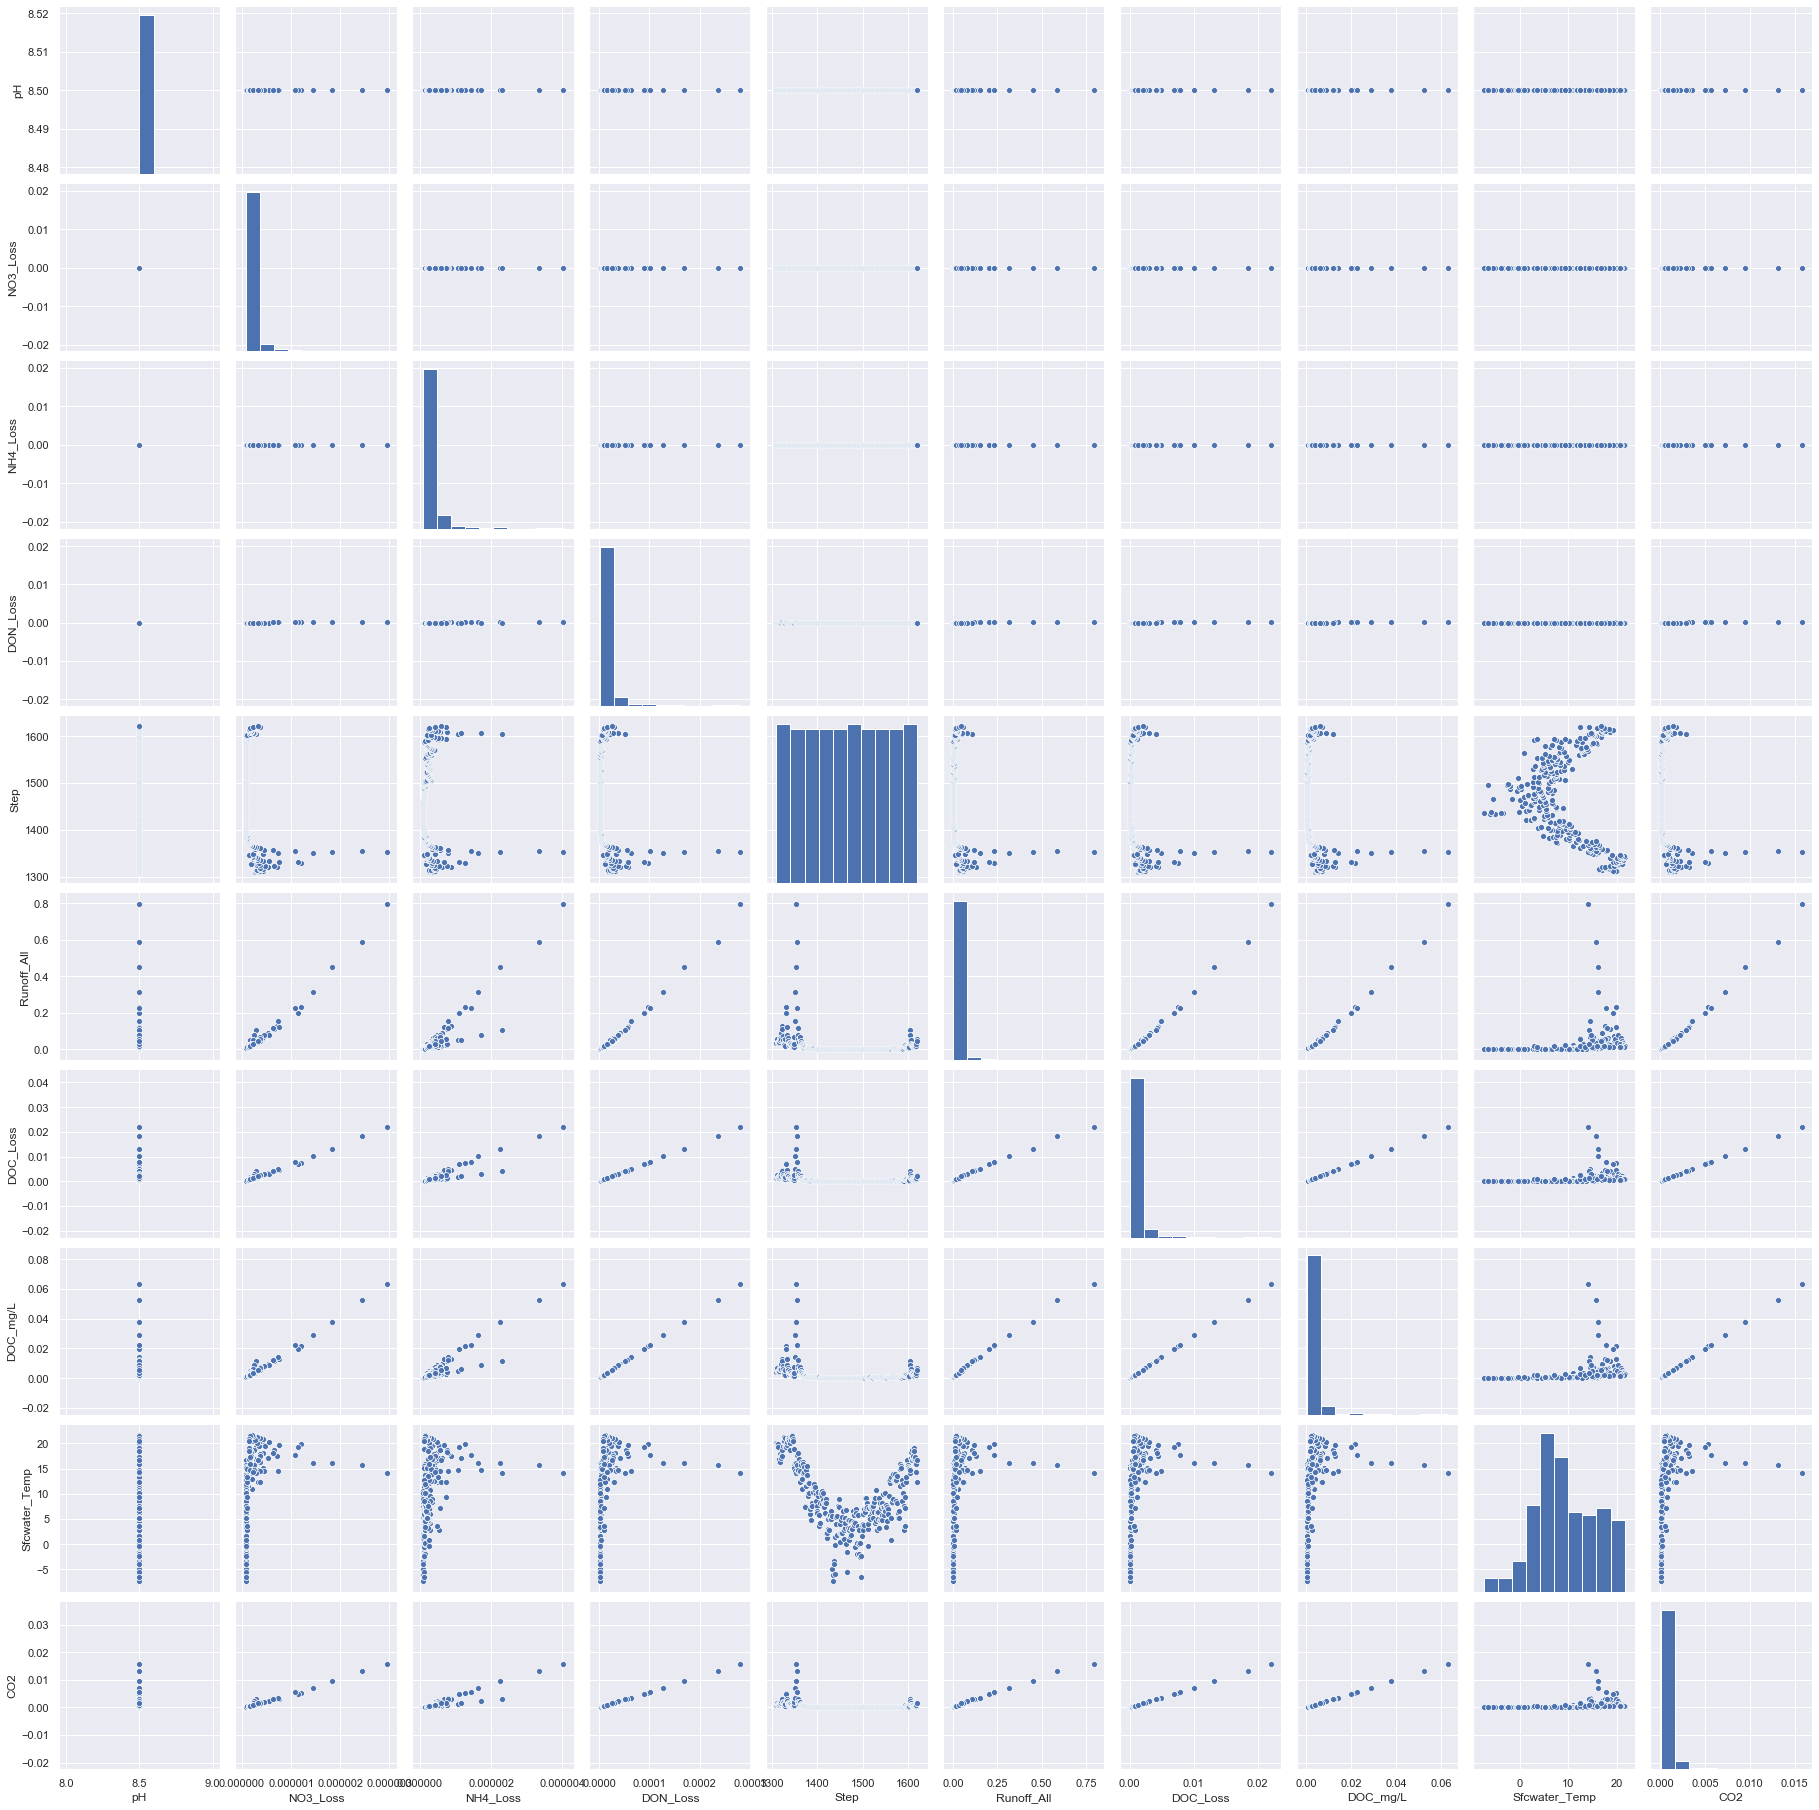

In [89]:
sns.pairplot(bc_pf.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

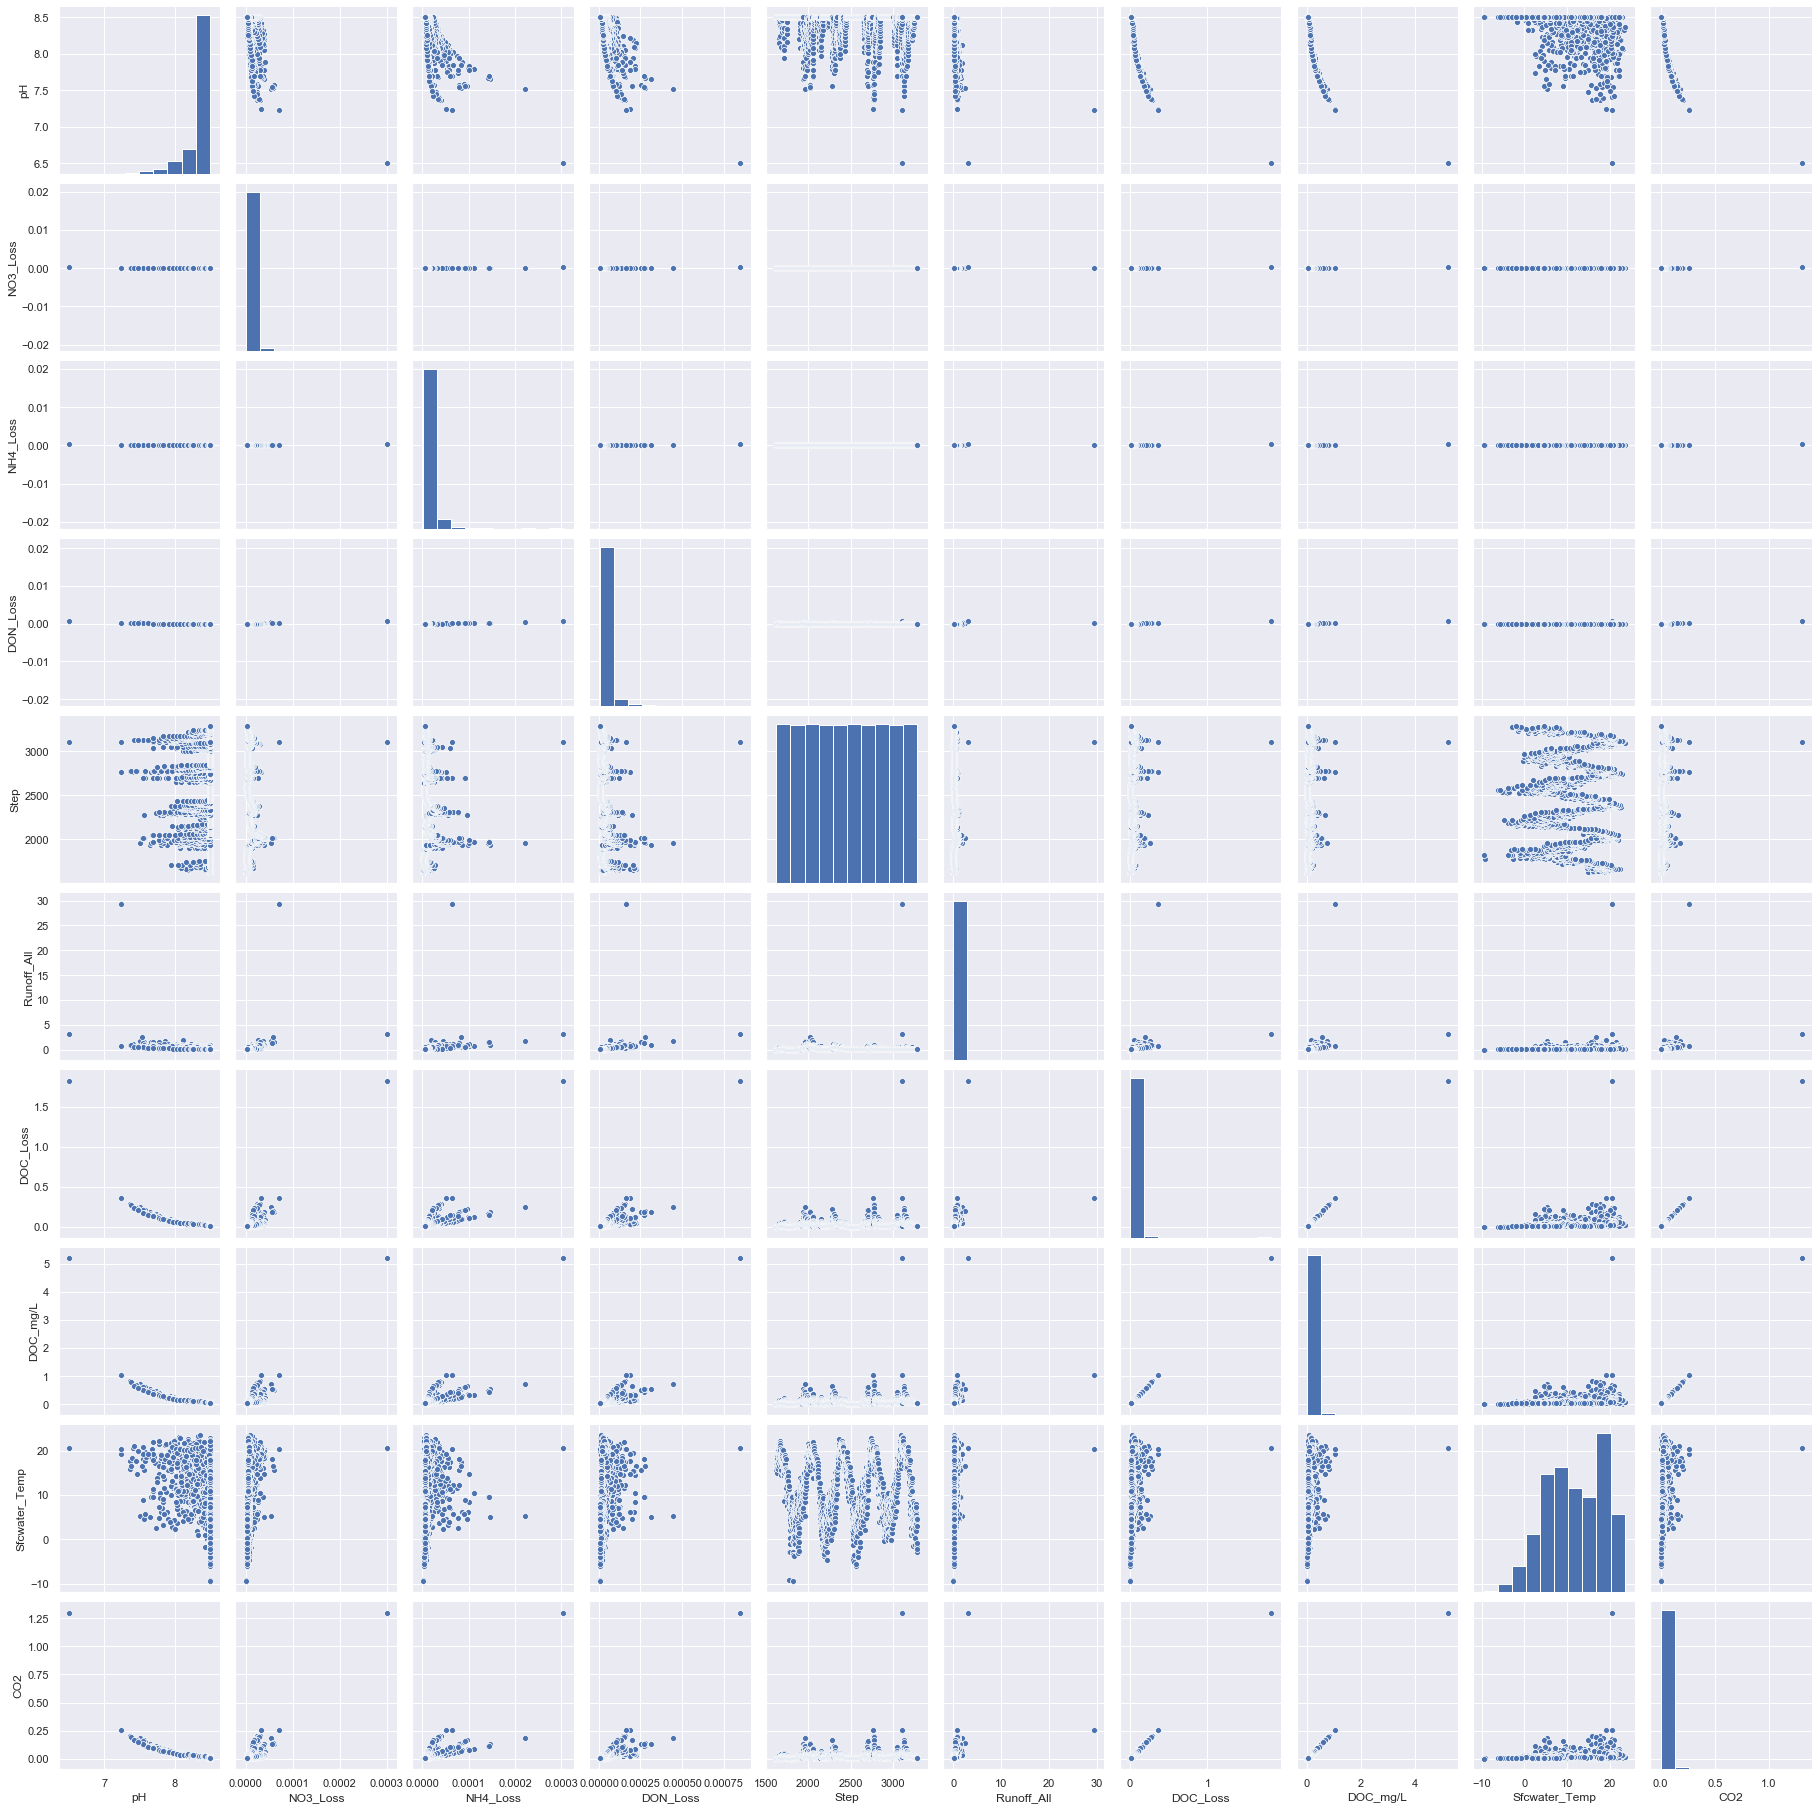

In [90]:
sns.pairplot(bc_pof.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

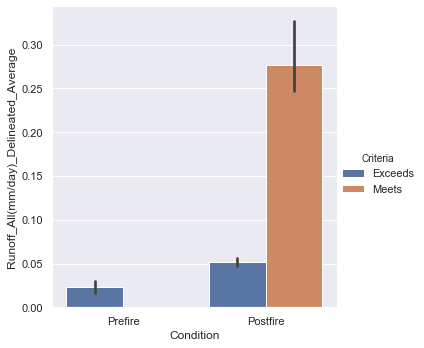

In [110]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Runoff_All(mm/day)_Delineated_Average',
            hue='Criteria')

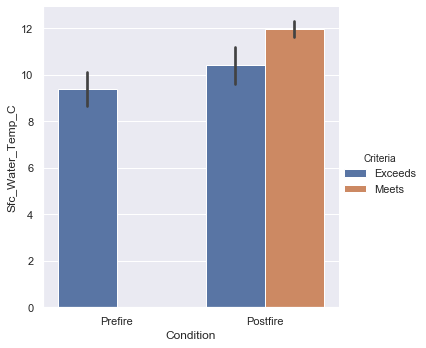

In [115]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Sfc_Water_Temp_C',
            hue='Criteria')

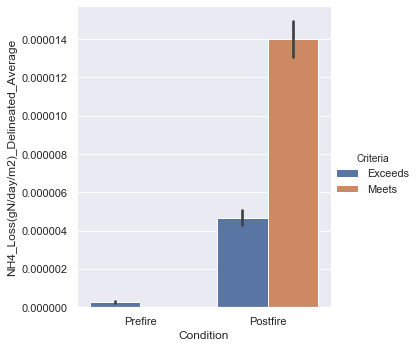

In [116]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

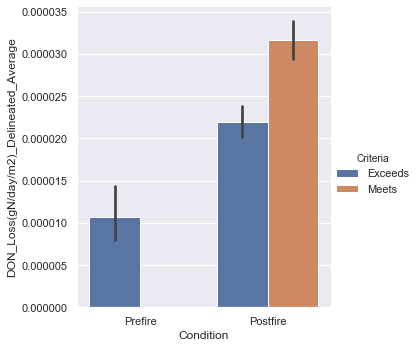

In [117]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DON_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

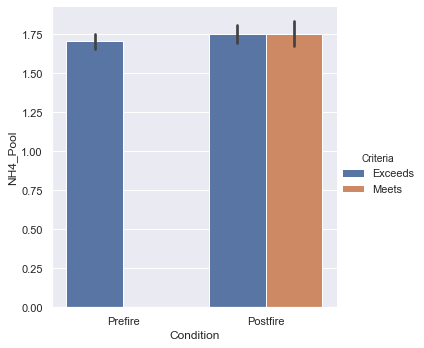

In [112]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Pool',
            hue='Criteria')

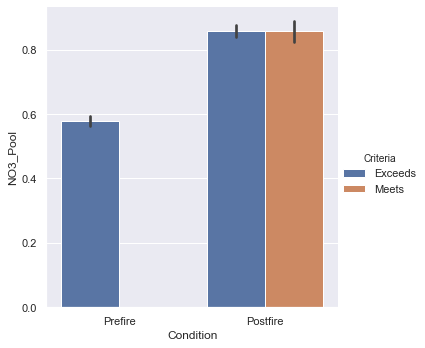

In [113]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NO3_Pool',
            hue='Criteria')

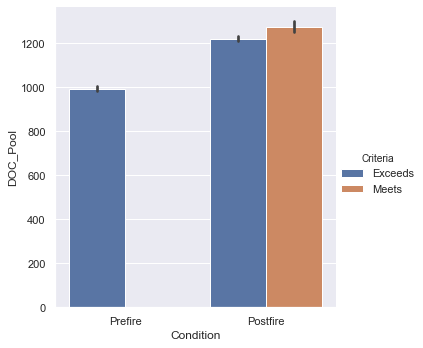

In [114]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Pool',
            hue='Criteria')

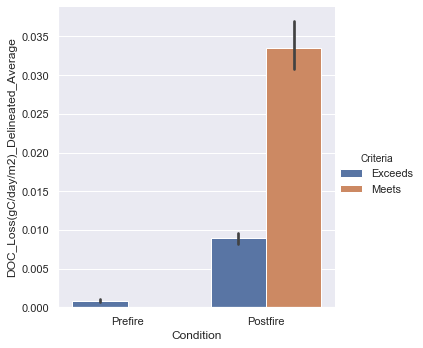

In [119]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Loss(gC/day/m2)_Delineated_Average',
            hue='Criteria')

In [143]:
#df_di_a.to_csv('072021_BCAPR21A_WQX_All_di.csv')

In [142]:
calc_pH(0.7, 22.9, 4.7, 50)

CO2 Estimate 15.909090909090908
Exponent value 5.853692464000001
H2CO3 value 1.400578760267948e-06
pkw= 1e-14
Alpha value= 2.2281934832444628e-05
SQRT of Alpha= 0.004720374437737395
A value 2.326023550138511
B value 0.43429448190325176
C value 0.00944074887547479



6.232002101795975

In [34]:
#data_df.loc[:,['new_ph_column']]=data_df.apply(lambda row: calc_pH(row['CO2_calc'],row['Sfcwater_Temp_C'],row['DOC_mg/L'], row['Alk_200']),axis=1)


CO2 Estimate 100.27939818060229
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 0.00013505007250641814
SQRT of Alpha= 0.011621104616447532
A value 1.9347525891550406
B value 0.43429448190325176
C value 0.023242209232895064

CO2 Estimate 100.36828403549367
Exponent value 5.873138107250001
H2CO3 value 1.3392507330202396e-06
pkw= 1e-14
Alpha value= 0.0001344182979765185
SQRT of Alpha= 0.011593890545305251
A value 1.935770803999259
B value 0.43429448190325176
C value 0.023187781090610503

CO2 Estimate 100.4587968543431
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 0.00013499147110374965
SQRT of Alpha= 0.011618583007568076
A value 1.9348468348991212
B value 0.43429448190325176
C value 0.023237166015136153

CO2 Estimate 100.54882219335494
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 0.00013481108576774803
SQRT of Alpha= 0.011610817618400007
A value 1.93513719674

B value 0.43429448190325176
C value 0.021848921322687155

CO2 Estimate 105.8086443322646
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 0.00011631970787617775
SQRT of Alpha= 0.010785161467320633
A value 1.9671733485826293
B value 0.43429448190325176
C value 0.021570322934641267

CO2 Estimate 105.82698576115496
Exponent value 5.968385845250001
H2CO3 value 1.0755092619547499e-06
pkw= 1e-14
Alpha value= 0.00011381790336087559
SQRT of Alpha= 0.010668547387572292
A value 1.971894709395427
B value 0.43429448190325176
C value 0.021337094775144585

CO2 Estimate 105.84335289670292
Exponent value 5.9781472752500004
H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 0.00011130542025077898
SQRT of Alpha= 0.010550138399603058
A value 1.976741843135041
B value 0.43429448190325176
C value 0.021100276799206116

CO2 Estimate 105.85917161743357
Exponent value 5.980980967250001
H2CO3 value 1.04476600459291e-06
pkw= 1e-14
Alpha value= 0.0001105980637902

C value 0.01824974967756425

CO2 Estimate 106.52913953226174
Exponent value 6.061632031250001
H2CO3 value 8.676967459363006e-07
pkw= 1e-14
Alpha value= 9.243498772953764e-05
SQRT of Alpha= 0.009614311609758529
A value 2.017081806047031
B value 0.43429448190325176
C value 0.019228623219517058

CO2 Estimate 106.53732919353367
Exponent value 5.993978497250001
H2CO3 value 1.013961587670372e-06
pkw= 1e-14
Alpha value= 0.00010802475946523648
SQRT of Alpha= 0.01039349601747345
A value 1.983238346021612
B value 0.43429448190325176
C value 0.0207869920349469

CO2 Estimate 106.54412953726845
Exponent value 6.011172055249999
H2CO3 value 9.74603450768408e-07
pkw= 1e-14
Alpha value= 0.00010383827631613809
SQRT of Alpha= 0.010190106786297094
A value 1.9918212648202105
B value 0.43429448190325176
C value 0.02038021357259419

CO2 Estimate 106.55058864511685
Exponent value 6.0149967252500005
H2CO3 value 9.660581634181786e-07
pkw= 1e-14
Alpha value= 0.00010293406598762742
SQRT of Alpha= 0.01014564270944

Alpha value= 0.00011508458867149862
SQRT of Alpha= 0.0107277485369251
A value 1.9694914150880174
B value 0.43429448190325176
C value 0.0214554970738502

CO2 Estimate 107.35703872748164
Exponent value 5.98598774525
H2CO3 value 1.0327905482256251e-06
pkw= 1e-14
Alpha value= 0.00011087733489323543
SQRT of Alpha= 0.0105298307153171
A value 1.977578610770318
B value 0.43429448190325176
C value 0.0210596614306342

CO2 Estimate 107.37089534186589
Exponent value 5.96976543125
H2CO3 value 1.0720982046808511e-06
pkw= 1e-14
Alpha value= 0.00011511214414098999
SQRT of Alpha= 0.010729032768194438
A value 1.9694394283015095
B value 0.43429448190325176
C value 0.021458065536388876

CO2 Estimate 107.38966331561413
Exponent value 5.945047285249999
H2CO3 value 1.1348872443381085e-06
pkw= 1e-14
Alpha value= 0.00012187515908065458
SQRT of Alpha= 0.011039708287842329
A value 1.9570424022095527
B value 0.43429448190325176
C value 0.022079416575684657

CO2 Estimate 107.40200874250175
Exponent value 5.9781472

C value 0.025662031231782328

CO2 Estimate 128.1644087503744
Exponent value 5.88884265927264
H2CO3 value 1.2916871547271863e-06
pkw= 1e-14
Alpha value= 0.0001655483204860632
SQRT of Alpha= 0.012866558222231119
A value 1.8905376104379406
B value 0.43429448190325176
C value 0.025733116444462238

CO2 Estimate 130.16441665415525
Exponent value 5.89850913125
H2CO3 value 1.2632545429948371e-06
pkw= 1e-14
Alpha value= 0.00016443079068463446
SQRT of Alpha= 0.01282305699451712
A value 1.892008427423724
B value 0.43429448190325176
C value 0.02564611398903424

CO2 Estimate 132.9457694286636
Exponent value 5.879075681856641
H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 0.00017563005609160545
SQRT of Alpha= 0.013252549041282792
A value 1.8777005799844564
B value 0.43429448190325176
C value 0.026505098082565584

CO2 Estimate 135.74314810283357
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 0.00017953281412386488
SQRT of Alpha= 0.0133989855632

Alpha value= 0.00045014179461463373
SQRT of Alpha= 0.02121654530348034
A value 1.6733253309803986
B value 0.43429448190325176
C value 0.04243309060696068

CO2 Estimate 350.8504267948183
Exponent value 5.89796154725
H2CO3 value 1.264848333106837e-06
pkw= 1e-14
Alpha value= 0.00044377257751124823
SQRT of Alpha= 0.021065910317649417
A value 1.6764197690370246
B value 0.43429448190325176
C value 0.042131820635298835

CO2 Estimate 352.46883548171286
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Alpha value= 0.00043562484250001497
SQRT of Alpha= 0.020871627691677882
A value 1.68044368078844
B value 0.43429448190325176
C value 0.041743255383355764

CO2 Estimate 354.01987445504915
Exponent value 5.91087020525
H2CO3 value 1.2278061227121812e-06
pkw= 1e-14
Alpha value= 0.000434667769427707
SQRT of Alpha= 0.020848687474939686
A value 1.6809212807541805
B value 0.43429448190325176
C value 0.04169737494987937

CO2 Estimate 354.68033651304376
Exponent value 5.95819730525

Alpha value= 0.00046019392703101165
SQRT of Alpha= 0.02145213106036348
A value 1.668529558407702
B value 0.43429448190325176
C value 0.04290426212072696

CO2 Estimate 444.74423518001345
Exponent value 5.95752800525
H2CO3 value 1.1027371221366084e-06
pkw= 1e-14
Alpha value= 0.000490435977999255
SQRT of Alpha= 0.022145789170839116
A value 1.6547088389089604
B value 0.43429448190325176
C value 0.04429157834167823

CO2 Estimate 445.4833521098075
Exponent value 5.948940127250001
H2CO3 value 1.1247600250597236e-06
pkw= 1e-14
Alpha value= 0.0005010618662927168
SQRT of Alpha= 0.022384411233997575
A value 1.6500543241614252
B value 0.43429448190325176
C value 0.04476882246799515

CO2 Estimate 446.1628502554609
Exponent value 5.953538287250001
H2CO3 value 1.1129142743426764e-06
pkw= 1e-14
Alpha value= 0.0004965410047407165
SQRT of Alpha= 0.02228320005611215
A value 1.6520224406565052
B value 0.43429448190325176
C value 0.0445664001122243

CO2 Estimate 446.6511588088014
Exponent value 5.971149985

Alpha value= 0.0004981792455503362
SQRT of Alpha= 0.022319929335693163
A value 1.6513071846971425
B value 0.43429448190325176
C value 0.044639858671386326

CO2 Estimate 478.6060958883473
Exponent value 6.020403429321289
H2CO3 value 9.541058763421122e-07
pkw= 1e-14
Alpha value= 0.00045664088855022853
SQRT of Alpha= 0.021369157413202527
A value 1.670212601748467
B value 0.43429448190325176
C value 0.042738314826405055

CO2 Estimate 478.6829227107557
Exponent value 6.07868193125
H2CO3 value 8.342919799876309e-07
pkw= 1e-14
Alpha value= 0.00039936132338462245
SQRT of Alpha= 0.019984026705962502
A value 1.6993169985934184
B value 0.43429448190325176
C value 0.039968053411925004

CO2 Estimate 478.7819298657755
Exponent value 6.0641578463750685
H2CO3 value 8.626649511415066e-07
pkw= 1e-14
Alpha value= 0.00041302839014509545
SQRT of Alpha= 0.020323099914754526
A value 1.6920100477073976
B value 0.43429448190325176
C value 0.04064619982950905

CO2 Estimate 478.9704383189818
Exponent value 6.025

H2CO3 value 1.2081866444090015e-06
pkw= 1e-14
Alpha value= 0.0006540888461204406
SQRT of Alpha= 0.02557516072521228
A value 1.592181628315569
B value 0.43429448190325176
C value 0.05115032145042456

CO2 Estimate 542.3203443886035
Exponent value 5.935510795250001
H2CO3 value 1.1600833796182916e-06
pkw= 1e-14
Alpha value= 0.000629136817964087
SQRT of Alpha= 0.02508259990439761
A value 1.600627449276234
B value 0.43429448190325176
C value 0.05016519980879522

CO2 Estimate 543.2973514791546
Exponent value 5.933637031250001
H2CO3 value 1.1650993735571457e-06
pkw= 1e-14
Alpha value= 0.0006329954038736195
SQRT of Alpha= 0.025159399910840867
A value 1.5992997216734486
B value 0.43429448190325176
C value 0.050318799821681734

CO2 Estimate 544.2122048904093
Exponent value 5.933637031250001
H2CO3 value 1.1650993735571457e-06
pkw= 1e-14
Alpha value= 0.000634061299009969
SQRT of Alpha= 0.025180573841951437
A value 1.5989343769464535
B value 0.43429448190325176
C value 0.050361147683902874

CO2 Esti

B value 0.43429448190325176
C value 0.05942937856760911

CO2 Estimate 677.1927560054869
Exponent value 5.878073677250001
H2CO3 value 1.3241168821762682e-06
pkw= 1e-14
Alpha value= 0.0008966823607243396
SQRT of Alpha= 0.029944654960849686
A value 1.5236806867361368
B value 0.43429448190325176
C value 0.05988930992169937

CO2 Estimate 680.0230151947039
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 0.0009137806750049316
SQRT of Alpha= 0.03022880538501202
A value 1.5195790154073197
B value 0.43429448190325176
C value 0.06045761077002404

CO2 Estimate 682.681730229064
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 0.0009091340279691618
SQRT of Alpha= 0.0301518494950005
A value 1.5206860433633702
B value 0.43429448190325176
C value 0.060303698990001

CO2 Estimate 685.1267828505969
Exponent value 5.880588037250001
H2CO3 value 1.3164730191343728e-06
pkw= 1e-14
Alpha value= 0.0009019509243191451
SQRT of Alpha=

C value 0.06710235592079757

CO2 Estimate 892.9736587110818
Exponent value 5.8952422572500005
H2CO3 value 1.2727928962562626e-06
pkw= 1e-14
Alpha value= 0.0011365705293614292
SQRT of Alpha= 0.03371306170257204
A value 1.4722018045792367
B value 0.43429448190325176
C value 0.06742612340514408

CO2 Estimate 894.2896592807109
Exponent value 5.91492932946036
H2CO3 value 1.216383920532327e-06
pkw= 1e-14
Alpha value= 0.00108779956185739
SQRT of Alpha= 0.03298180652810561
A value 1.4817255602227128
B value 0.43429448190325176
C value 0.06596361305621122

CO2 Estimate 895.5668564552659
Exponent value 5.916687595250001
H2CO3 value 1.2114692767064332e-06
pkw= 1e-14
Alpha value= 0.0010849517318421151
SQRT of Alpha= 0.03293860549328273
A value 1.4822947913044604
B value 0.43429448190325176
C value 0.06587721098656546

CO2 Estimate 897.2247753829996
Exponent value 5.90182072465876
H2CO3 value 1.2536585743015389e-06
pkw= 1e-14
Alpha value= 0.0011248135327446699
SQRT of Alpha= 0.033538239857581524
A 

Exponent value 6.00062816525
H2CO3 value 9.985546415974415e-07
pkw= 1e-14
Alpha value= 0.0009303669238632092
SQRT of Alpha= 0.03050191672441601
A value 1.5156728689587173
B value 0.43429448190325176
C value 0.06100383344883202

CO2 Estimate 931.9995395832378
Exponent value 5.996183875250001
H2CO3 value 1.0088256705477753e-06
pkw= 1e-14
Alpha value= 0.0009402250604802777
SQRT of Alpha= 0.03066308954558033
A value 1.513384088718505
B value 0.43429448190325176
C value 0.06132617909116066

CO2 Estimate 932.3011921067548
Exponent value 5.99251445525
H2CO3 value 1.017385502507105e-06
pkw= 1e-14
Alpha value= 0.0009485097168295038
SQRT of Alpha= 0.03079788494084462
A value 1.5114791078521719
B value 0.43429448190325176
C value 0.06159576988168924

CO2 Estimate 932.5666736263206
Exponent value 6.00062816525
H2CO3 value 9.985546415974415e-07
pkw= 1e-14
Alpha value= 0.0009312187805586488
SQRT of Alpha= 0.0305158775157892
A value 1.5154741369384053
B value 0.43429448190325176
C value 0.06103175503

CO2 Estimate 960.270055302095
Exponent value 6.002119531250001
H2CO3 value 9.951314887466618e-07
pkw= 1e-14
Alpha value= 0.000955594969741613
SQRT of Alpha= 0.030912699166226378
A value 1.509863072522617
B value 0.43429448190325176
C value 0.061825398332452756

CO2 Estimate 960.4926385959506
Exponent value 6.011172055249999
H2CO3 value 9.74603450768408e-07
pkw= 1e-14
Alpha value= 0.0009360994400232668
SQRT of Alpha= 0.030595742187815394
A value 1.5143390072765093
B value 0.43429448190325176
C value 0.06119148437563079

CO2 Estimate 960.7668947525934
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 0.0009610227857685797
SQRT of Alpha= 0.031000367510218
A value 1.5086331575620613
B value 0.43429448190325176
C value 0.062000735020436

CO2 Estimate 960.931662937708
Exponent value 6.0298136461944845
H2CO3 value 9.336548419418363e-07
pkw= 1e-14
Alpha value= 0.0008971784998870117
SQRT of Alpha= 0.02995293808438517
A value 1.5235605712295055
B value 0

SQRT of Alpha= 0.03699002589095902
A value 1.4319153647025378
B value 0.43429448190325176
C value 0.07398005178191804

CO2 Estimate 1032.7453401919774
Exponent value 5.86596762725
H2CO3 value 1.361546169712211e-06
pkw= 1e-14
Alpha value= 0.0014061304622365212
SQRT of Alpha= 0.0374984061292813
A value 1.4259871915781204
B value 0.43429448190325176
C value 0.0749968122585626

CO2 Estimate 1035.6650519313976
Exponent value 5.866907532684642
H2CO3 value 1.3586026811387132e-06
pkw= 1e-14
Alpha value= 0.0014070573163256614
SQRT of Alpha= 0.03751076267320702
A value 1.4258441056333873
B value 0.43429448190325176
C value 0.07502152534641404

CO2 Estimate 1038.1267276153928
Exponent value 5.8775745312500005
H2CO3 value 1.3256395992014367e-06
pkw= 1e-14
Alpha value= 0.0013761818991263684
SQRT of Alpha= 0.03709692573686354
A value 1.4306620793562919
B value 0.43429448190325176
C value 0.07419385147372708

CO2 Estimate 1040.0918563367923
Exponent value 5.88989682725
H2CO3 value 1.288555629811343e-

H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 0.0016548865794500365
SQRT of Alpha= 0.04068029718979492
A value 1.3906158830006066
B value 0.43429448190325176
C value 0.08136059437958984

CO2 Estimate 1254.9678014718359
Exponent value 5.88109464877584
H2CO3 value 1.3149382274536986e-06
pkw= 1e-14
Alpha value= 0.0016502051363888408
SQRT of Alpha= 0.04062271699909843
A value 1.3912310327220971
B value 0.43429448190325176
C value 0.08124543399819686

CO2 Estimate 1257.2586642207307
Exponent value 5.880588037250001
H2CO3 value 1.3164730191343728e-06
pkw= 1e-14
Alpha value= 0.001655147109529514
SQRT of Alpha= 0.04068349922916555
A value 1.3905817000324703
B value 0.43429448190325176
C value 0.0813669984583311

CO2 Estimate 1259.5223255946862
Exponent value 5.881602461691041
H2CO3 value 1.3134015918189974e-06
pkw= 1e-14
Alpha value= 0.0016542586273776264
SQRT of Alpha= 0.040672578322226226
A value 1.3906982958613836
B value 0.43429448190325176
C value 0.08134515664445245

CO2 Est

A value 1.4044898621112956
B value 0.43429448190325176
C value 0.07880252502251228

CO2 Estimate 1354.238000612111
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 0.0014171777164369993
SQRT of Alpha= 0.03764542092256373
A value 1.4242878425444419
B value 0.43429448190325176
C value 0.07529084184512747

CO2 Estimate 1354.5519376275356
Exponent value 5.98598774525
H2CO3 value 1.0327905482256251e-06
pkw= 1e-14
Alpha value= 0.0013989684382724253
SQRT of Alpha= 0.03740278650411524
A value 1.4270960416957388
B value 0.43429448190325176
C value 0.07480557300823049

CO2 Estimate 1354.813714300336
Exponent value 5.996183875250001
H2CO3 value 1.0088256705477753e-06
pkw= 1e-14
Alpha value= 0.0013667708538063585
SQRT of Alpha= 0.036969864130212304
A value 1.432152145521226
B value 0.43429448190325176
C value 0.07393972826042461

CO2 Estimate 1355.1543652108621
Exponent value 5.981692495250001
H2CO3 value 1.0430557096912576e-06
pkw= 1e-14
Alpha value= 0.00141

A value 1.4622563974868268
B value 0.43429448190325176
C value 0.06898800690739518

CO2 Estimate 1379.3370700034034
Exponent value 6.0641578463750685
H2CO3 value 8.626649511415066e-07
pkw= 1e-14
Alpha value= 0.001189905746112155
SQRT of Alpha= 0.03449501045241406
A value 1.4622437191207767
B value 0.43429448190325176
C value 0.06899002090482811

CO2 Estimate 1379.4284237249726
Exponent value 6.049992696153084
H2CO3 value 8.912659270765605e-07
pkw= 1e-14
Alpha value= 0.0012294375529169962
SQRT of Alpha= 0.03506333630613317
A value 1.455146762788502
B value 0.43429448190325176
C value 0.07012667261226634

CO2 Estimate 1379.615615982617
Exponent value 6.012698199288169
H2CO3 value 9.71184630190219e-07
pkw= 1e-14
Alpha value= 0.0013398614818227294
SQRT of Alpha= 0.036604118372428114
A value 1.436470048873398
B value 0.43429448190325176
C value 0.07320823674485623

CO2 Estimate 1379.8314720547137
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 0.001366

A value 1.409554606747995
B value 0.43429448190325176
C value 0.07788886743709968

CO2 Estimate 1417.735271836644
Exponent value 5.9380265352500015
H2CO3 value 1.1533827843593936e-06
pkw= 1e-14
Alpha value= 0.0016351914553254703
SQRT of Alpha= 0.040437500606806426
A value 1.3932156954701873
B value 0.43429448190325176
C value 0.08087500121361285

CO2 Estimate 1419.0600470433503
Exponent value 5.91087020525
H2CO3 value 1.2278061227121812e-06
pkw= 1e-14
Alpha value= 0.0017423306142660615
SQRT of Alpha= 0.041741233981113464
A value 1.379434716188945
B value 0.43429448190325176
C value 0.08348246796222693

CO2 Estimate 1420.7852381886755
Exponent value 5.8957836312500005
H2CO3 value 1.2712072724153442e-06
pkw= 1e-14
Alpha value= 0.0018061125273358114
SQRT of Alpha= 0.042498382643764356
A value 1.371627597532135
B value 0.43429448190325176
C value 0.08499676528752871

CO2 Estimate 1422.4811805437428
Exponent value 5.8968701052500005
H2CO3 value 1.268031069269592e-06
pkw= 1e-14
Alpha value= 

H2CO3 value 1.3989404206295284e-06
pkw= 1e-14
Alpha value= 0.0021393088921826545
SQRT of Alpha= 0.04625266362257048
A value 1.3348632518271217
B value 0.43429448190325176
C value 0.09250532724514096

CO2 Estimate 1532.0491962617298
Exponent value 5.862717037250001
H2CO3 value 1.371775249476677e-06
pkw= 1e-14
Alpha value= 0.0021016271684224765
SQRT of Alpha= 0.04584350737479056
A value 1.3387221629593709
B value 0.43429448190325176
C value 0.09168701474958112

CO2 Estimate 1534.5442155666183
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 0.002066628951930842
SQRT of Alpha= 0.04546019084793686
A value 1.342368745381134
B value 0.43429448190325176
C value 0.09092038169587371

CO2 Estimate 1537.2539209919926
Exponent value 5.86503267725
H2CO3 value 1.3644804662842214e-06
pkw= 1e-14
Alpha value= 0.0020975529469224015
SQRT of Alpha= 0.04579904962903053
A value 1.3391435338989723
B value 0.43429448190325176
C value 0.09159809925806106

CO2 Estimate 154

Exponent value 5.91434573525
H2CO3 value 1.2180195659593493e-06
pkw= 1e-14
Alpha value= 0.0020784328228931575
SQRT of Alpha= 0.04558983245081251
A value 1.3411320038897527
B value 0.43429448190325176
C value 0.09117966490162502

CO2 Estimate 1707.2310231632125
Exponent value 5.93488496525
H2CO3 value 1.1617562959610821e-06
pkw= 1e-14
Alpha value= 0.001983386389829942
SQRT of Alpha= 0.044535226392485555
A value 1.3512963356294614
B value 0.43429448190325176
C value 0.08907045278497111

CO2 Estimate 1707.9115450165257
Exponent value 5.94569298725
H2CO3 value 1.1332011660962206e-06
pkw= 1e-14
Alpha value= 0.0019354073544119248
SQRT of Alpha= 0.04399326487556845
A value 1.3566138064971498
B value 0.43429448190325176
C value 0.0879865297511369

CO2 Estimate 1708.6763033857776
Exponent value 5.938658575250001
H2CO3 value 1.1517054573659988e-06
pkw= 1e-14
Alpha value= 0.001967891823491361
SQRT of Alpha= 0.04436092676546964
A value 1.3529993893730767
B value 0.43429448190325176
C value 0.08872

A value 1.3399885206967501
B value 0.43429448190325176
C value 0.09142005431254704

CO2 Estimate 1756.064803376276
Exponent value 5.982405265250001
H2CO3 value 1.0413452365090698e-06
pkw= 1e-14
Alpha value= 0.0018286697180071212
SQRT of Alpha= 0.0427629479573979
A value 1.3689323633907553
B value 0.43429448190325176
C value 0.0855258959147958

CO2 Estimate 1756.6047360444204
Exponent value 5.956193131250001
H2CO3 value 1.1061317765286751e-06
pkw= 1e-14
Alpha value= 0.0019430363173494993
SQRT of Alpha= 0.044079885632218915
A value 1.3557595409566494
B value 0.43429448190325176
C value 0.08815977126443783

CO2 Estimate 1757.0399580434441
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 0.001895703495779157
SQRT of Alpha= 0.043539677258555294
A value 1.3611147945266195
B value 0.43429448190325176
C value 0.08707935451711059

CO2 Estimate 1757.5640963648495
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value

CO2 Estimate 1780.1903755318492
Exponent value 6.00586968125
H2CO3 value 9.865754829351352e-07
pkw= 1e-14
Alpha value= 0.0017562921794668138
SQRT of Alpha= 0.04190813977578597
A value 1.3777016162609121
B value 0.43429448190325176
C value 0.08381627955157193

CO2 Estimate 1780.5470157810487
Exponent value 5.9781472752500004
H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 0.0018724324997947653
SQRT of Alpha= 0.04327161309443831
A value 1.3637969147167976
B value 0.43429448190325176
C value 0.08654322618887662

CO2 Estimate 1780.9841876994233
Exponent value 5.966325781250001
H2CO3 value 1.080623029651281e-06
pkw= 1e-14
Alpha value= 0.0019245725286827764
SQRT of Alpha= 0.04386995017871318
A value 1.357832858805044
B value 0.43429448190325176
C value 0.08773990035742636

CO2 Estimate 1781.319378835768
Exponent value 5.981692495250001
H2CO3 value 1.0430557096912576e-06
pkw= 1e-14
Alpha value= 0.0018580153488883323
SQRT of Alpha= 0.043104702166797675
A value 1.3654753513310451
B v

H2CO3 value 1.2147469540416019e-06
pkw= 1e-14
Alpha value= 0.00223386770580114
SQRT of Alpha= 0.04726380968353207
A value 1.3254712751316482
B value 0.43429448190325176
C value 0.09452761936706414

CO2 Estimate 1840.2494514616733
Exponent value 5.90914919962596
H2CO3 value 1.2326812791919788e-06
pkw= 1e-14
Alpha value= 0.0022684410478701123
SQRT of Alpha= 0.04762815394144636
A value 1.3221362513370432
B value 0.43429448190325176
C value 0.09525630788289272

CO2 Estimate 1841.9178024579319
Exponent value 5.894163235250001
H2CO3 value 1.275959132775207e-06
pkw= 1e-14
Alpha value= 0.0023502118418774376
SQRT of Alpha= 0.04847898350705631
A value 1.314446494904156
B value 0.43429448190325176
C value 0.09695796701411262

CO2 Estimate 1843.8930707599532
Exponent value 5.88467559725
H2CO3 value 1.3041405619877234e-06
pkw= 1e-14
Alpha value= 0.0024046957455561542
SQRT of Alpha= 0.04903769718855234
A value 1.3094699324901822
B value 0.43429448190325176
C value 0.09807539437710468

CO2 Estimate 1

CO2 Estimate 2015.614473286132
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 0.0026842137760203066
SQRT of Alpha= 0.05180939852980641
A value 1.285591449533036
B value 0.43429448190325176
C value 0.10361879705961281

CO2 Estimate 2017.2134071535145
Exponent value 5.8952422572500005
H2CO3 value 1.2727928962562626e-06
pkw= 1e-14
Alpha value= 0.002567494894867885
SQRT of Alpha= 0.05067045386483019
A value 1.295245205634166
B value 0.43429448190325176
C value 0.10134090772966038

CO2 Estimate 2019.1637164878503
Exponent value 5.883646268941441
H2CO3 value 1.3072351922925973e-06
pkw= 1e-14
Alpha value= 0.00263952186920323
SQRT of Alpha= 0.05137627729996822
A value 1.2892373676962696
B value 0.43429448190325176
C value 0.10275255459993644

CO2 Estimate 2021.564457192144
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 0.002719499136005156
SQRT of Alpha= 0.05214881720619516
A value 1.2827555374128683
B value 

H2CO3 value 1.1533827843593936e-06
pkw= 1e-14
Alpha value= 0.0024972987837672896
SQRT of Alpha= 0.04997298053715917
A value 1.3012647471706065
B value 0.43429448190325176
C value 0.09994596107431834

CO2 Estimate 2165.873308513671
Exponent value 5.939291857250001
H2CO3 value 1.1500272807895741e-06
pkw= 1e-14
Alpha value= 0.002490813391534695
SQRT of Alpha= 0.04990804936615631
A value 1.3018294040082423
B value 0.43429448190325176
C value 0.09981609873231262

CO2 Estimate 2166.8478782050333
Exponent value 5.921430931250001
H2CO3 value 1.1983096832232253e-06
pkw= 1e-14
Alpha value= 0.0025965547945347913
SQRT of Alpha= 0.05095640091818487
A value 1.292801254074804
B value 0.43429448190325176
C value 0.10191280183636973

CO2 Estimate 2167.8405821463557
Exponent value 5.91845703125
H2CO3 value 1.2065434567400433e-06
pkw= 1e-14
Alpha value= 0.0026155938696542113
SQRT of Alpha= 0.051142877017764765
A value 1.2912148445968425
B value 0.43429448190325176
C value 0.10228575403552953

CO2 Estimat

KeyError: "None of [Index(['new_ph_column'], dtype='object')] are in the [columns]"

In [35]:
#data_df.head()

Unnamed: 0  Unnamed: 0.1  Step  Runoff_All(mm/day)_Delineated_Average  \
0        1309          1309  1309                               0.033263   
1        1310          1310  1310                               0.049179   
2        1311          1311  1311                               0.059759   
3        1312          1312  1312                               0.043197   
4        1313          1313  1313                               0.033944   

   DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            1.723507                           62.777660   
1                            1.723849                           62.833305   
2                            1.724200                           62.889969   
3                            1.724550                           62.946327   
4                            1.724894                           62.999870   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.217128                            0.052924   
1                            0.218451                            0.053354   
2                            0.216999                            0.053639   
3                            0.215869                            0.053804   
4                            0.215563                            0.053926   

   Sfcwater_Temp_C       CO2  DOC_mg/L  CO2_calc  pH_calc_200 Criteria  \
0        20.112500  1.122465  4.489858  4.412294          0.0    Meets   
1        19.737500  1.123459  4.493838  4.416204          0.0    Meets   
2        19.962502  1.124473  4.497891  4.420187          0.0    Meets   
3        19.812500  1.125480  4.501921  4.424148          0.0    Meets   
4        19.287498  1.126438  4.505751  4.427911          0.0    Meets   

  Condition  Alk_200  
0   Prefire      200  
1   Prefire      200  
2   Prefire      200  
3   Prefire      200  
4   Prefire      200